In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 8)
%matplotlib inline



In [2]:
# Loading the train dataset
train_data = pd.read_csv('train.csv')

# Displaying the first few rows of the dataset for an initial overview
train_data.head()


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

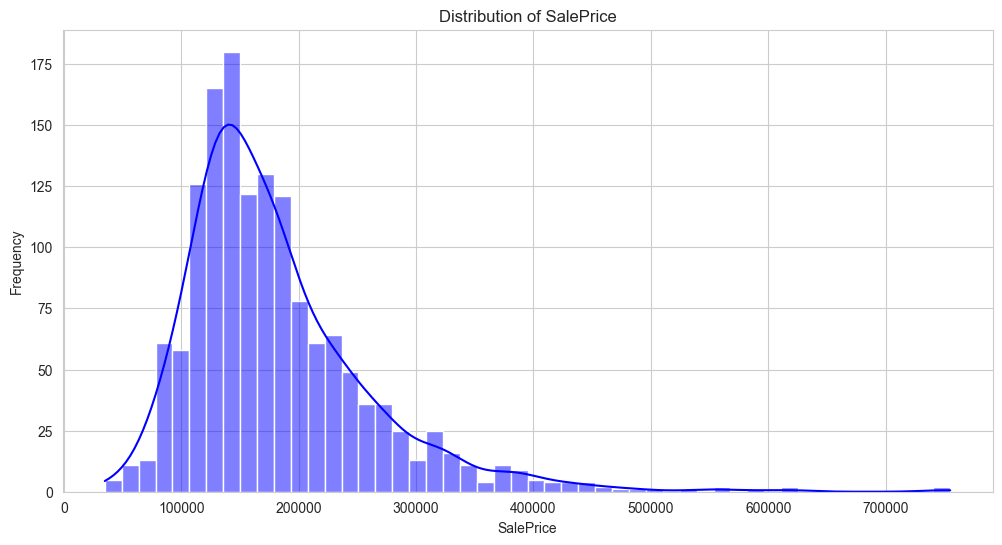

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [3]:
# Loading the training dataset
train = pd.read_csv('train.csv')

# Visualizing the distribution of SalePrice
plt.figure(figsize=(12, 6))
sns.histplot(train['SalePrice'], bins=50, kde=True, color='blue')
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

# Computing basic statistics
saleprice_stats = train['SalePrice'].describe()
saleprice_stats


In [4]:
# List of categorical features
categorical_features = train_data.select_dtypes(include=['object']).columns.tolist()

categorical_features


['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

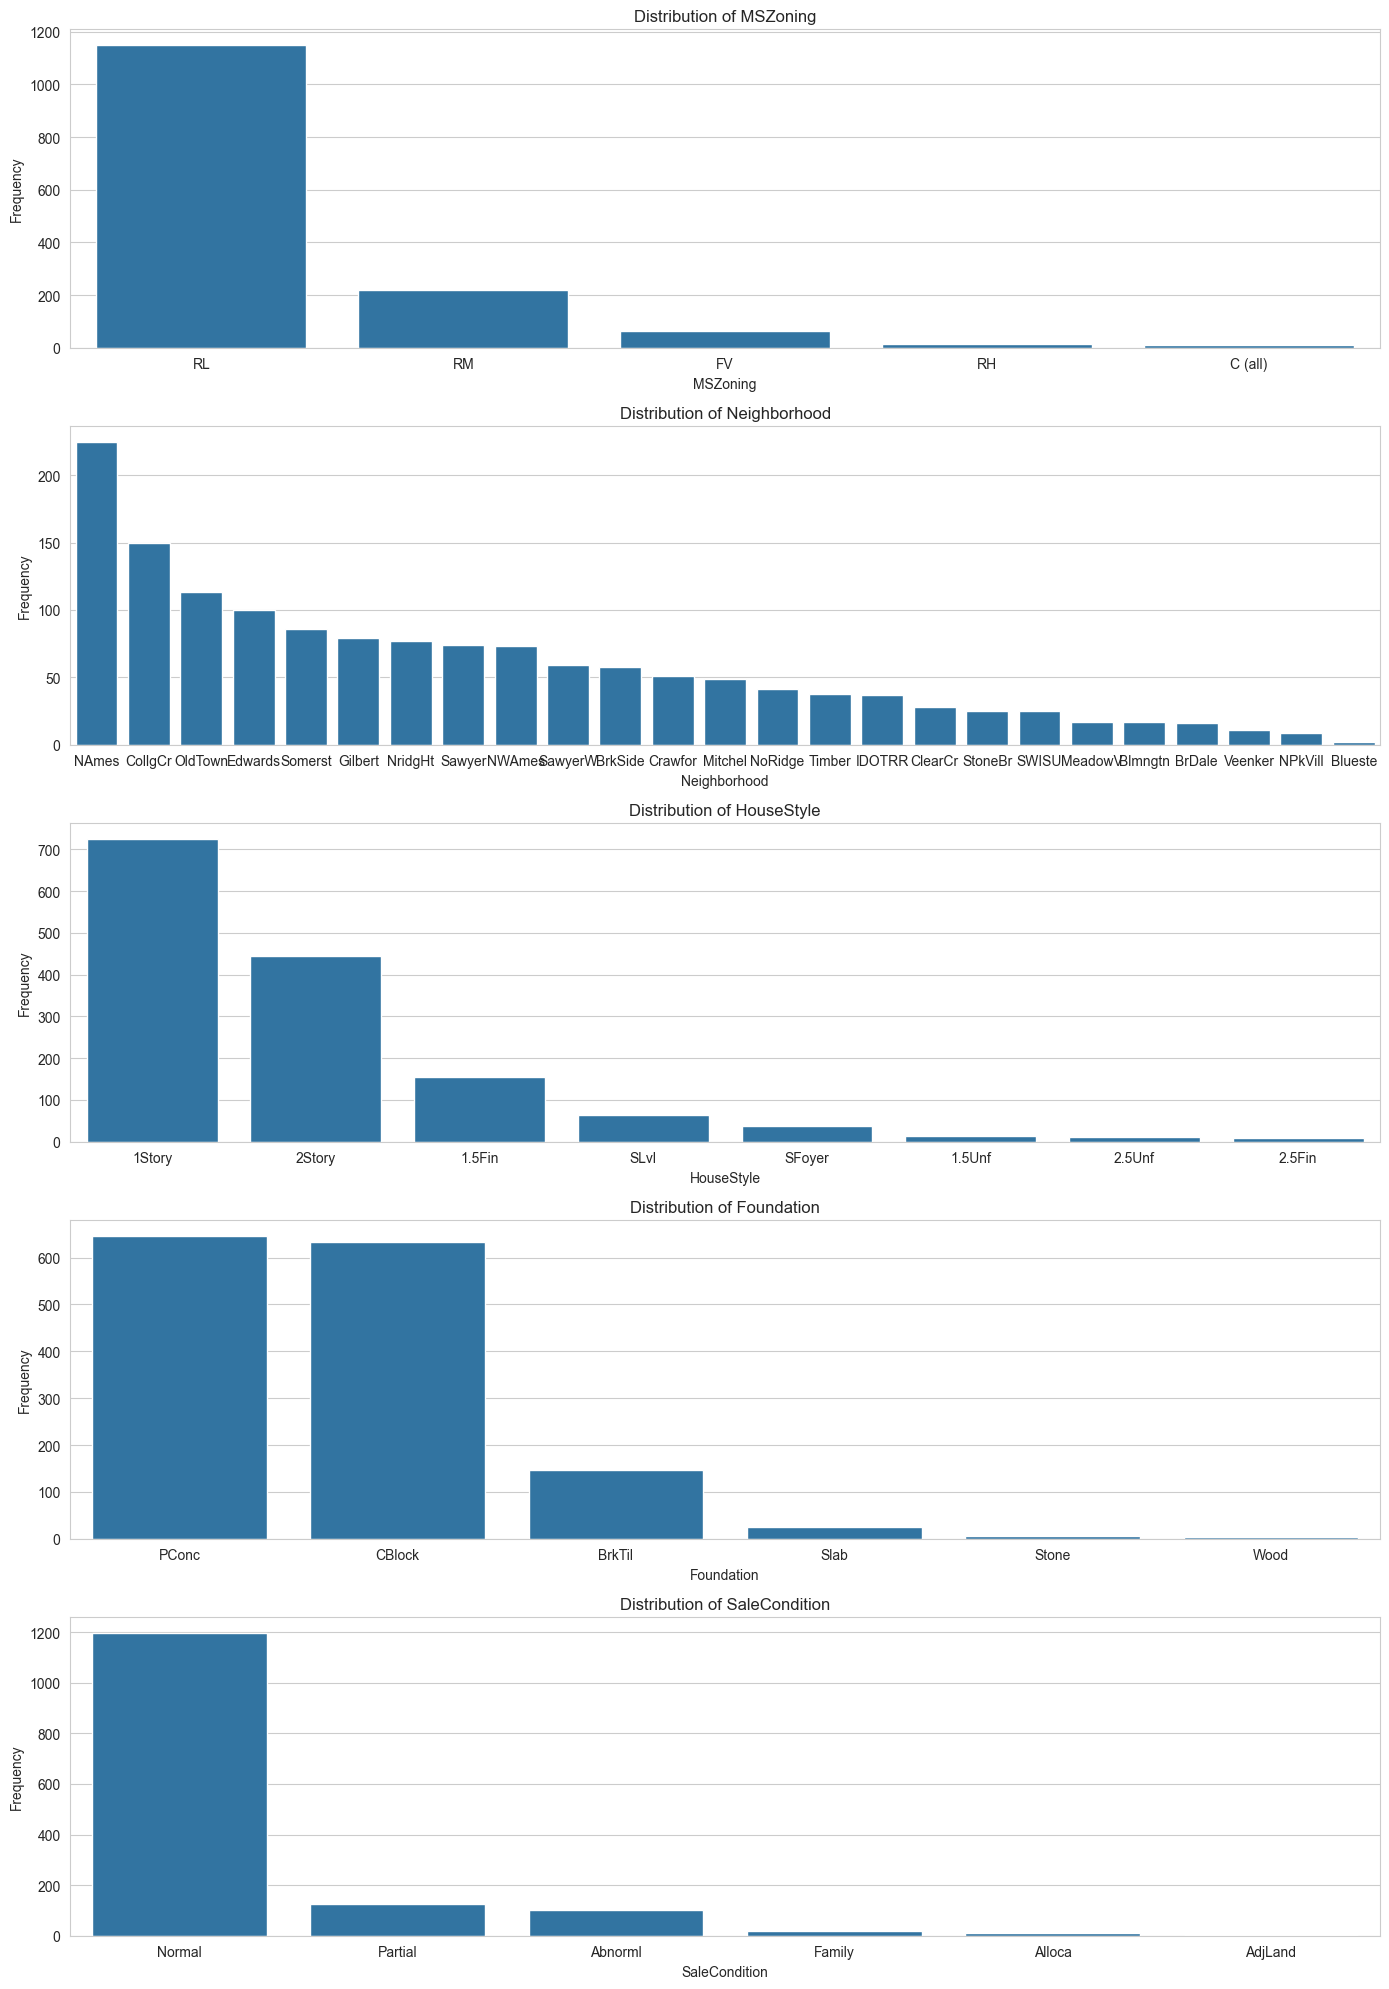

In [5]:
# Selected categorical features
selected_features = ['MSZoning', 'Neighborhood', 'HouseStyle', 'Foundation', 'SaleCondition']

# Plotting the distribution of selected categorical features
fig, axes = plt.subplots(nrows=len(selected_features), figsize=(14, 20))

for i, feature in enumerate(selected_features):
    sns.countplot(data=train_data, x=feature, ax=axes[i], order=train_data[feature].value_counts().index)
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_ylabel('Frequency')
    plt.tight_layout()

plt.show()


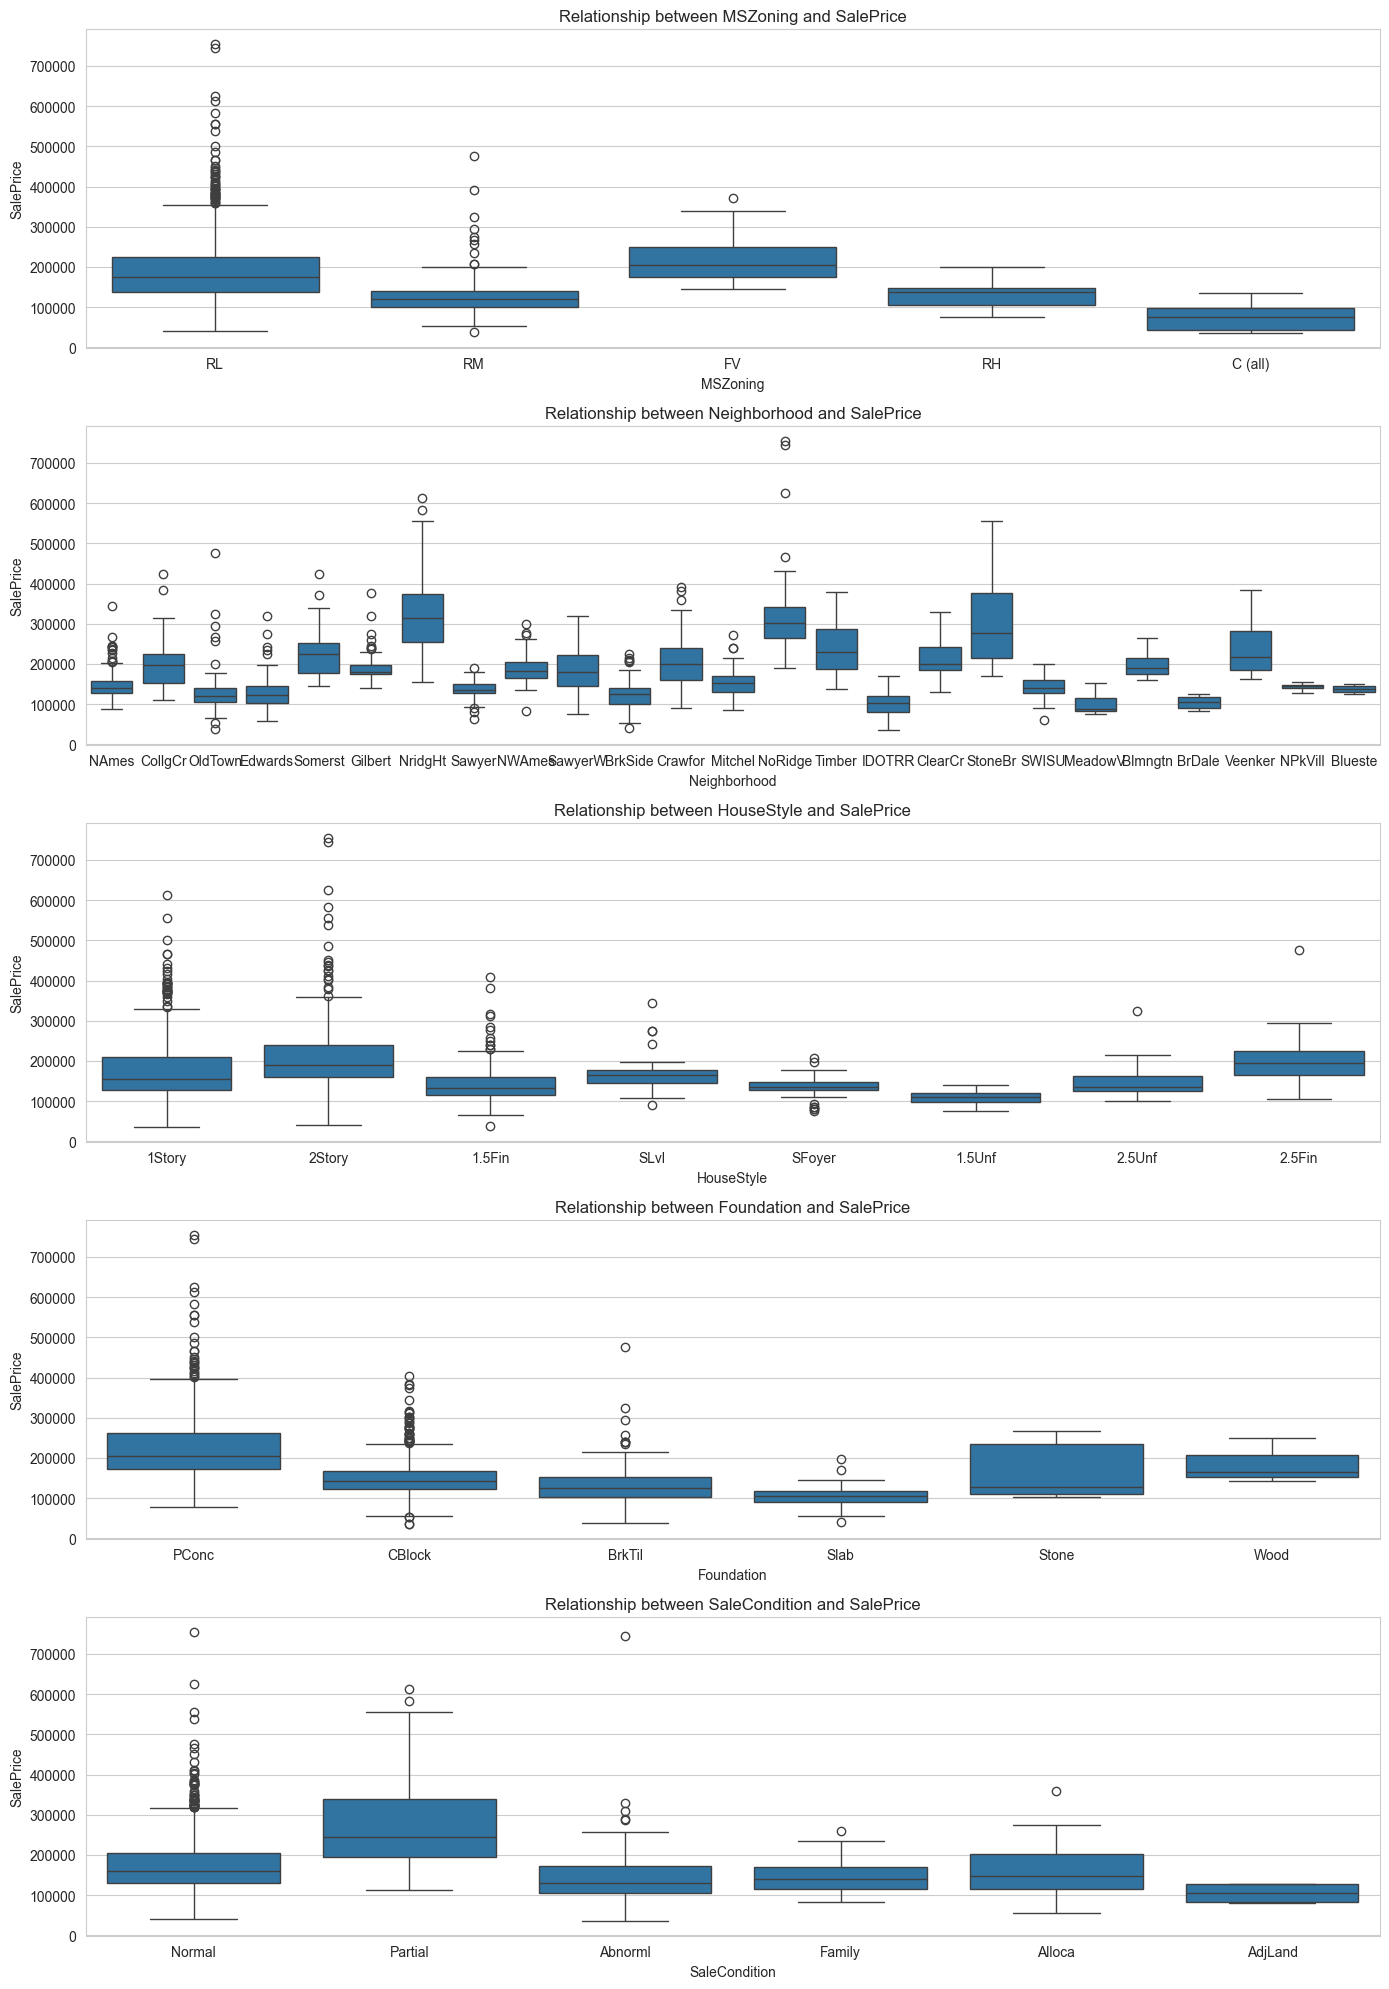

In [6]:
# Plotting the relationship between selected categorical features and SalePrice
fig, axes = plt.subplots(nrows=len(selected_features), figsize=(14, 20))

for i, feature in enumerate(selected_features):
    sns.boxplot(data=train_data, x=feature, y='SalePrice', ax=axes[i], order=train_data[feature].value_counts().index)
    axes[i].set_title(f'Relationship between {feature} and SalePrice')
    axes[i].set_ylabel('SalePrice')
    plt.tight_layout()

plt.show()


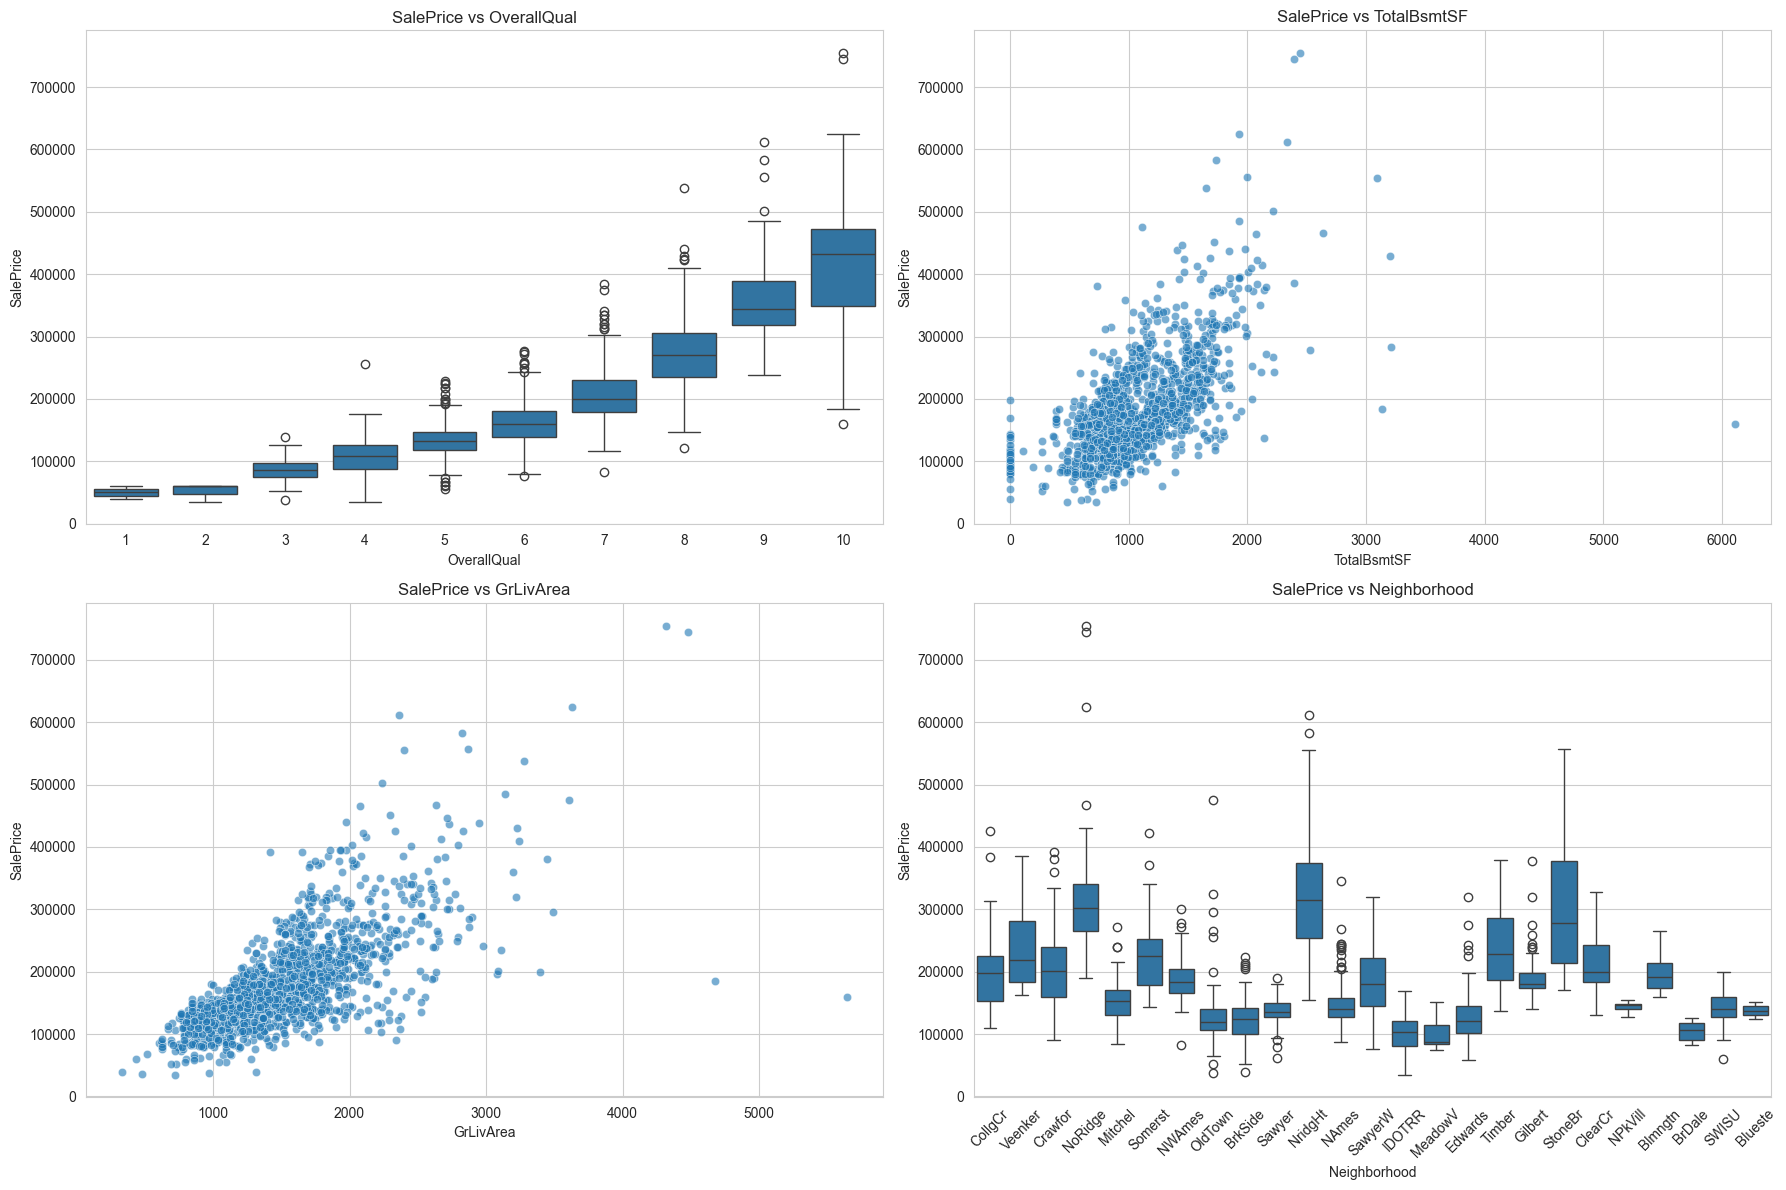

In [7]:
# Visualization of relationships between selected features and SalePrice

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))

# Relationship between OverallQual and SalePrice
sns.boxplot(data=train_data, x='OverallQual', y='SalePrice', ax=axes[0, 0])
axes[0, 0].set_title('SalePrice vs OverallQual')

# Relationship between TotalBsmtSF and SalePrice
sns.scatterplot(data=train_data, x='TotalBsmtSF', y='SalePrice', ax=axes[0, 1], alpha=0.6)
axes[0, 1].set_title('SalePrice vs TotalBsmtSF')

# Relationship between GrLivArea and SalePrice
sns.scatterplot(data=train_data, x='GrLivArea', y='SalePrice', ax=axes[1, 0], alpha=0.6)
axes[1, 0].set_title('SalePrice vs GrLivArea')

# Relationship between Neighborhood and SalePrice
sns.boxplot(data=train_data, x='Neighborhood', y='SalePrice', ax=axes[1, 1])
axes[1, 1].set_title('SalePrice vs Neighborhood')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [8]:

# Identifying missing values in the dataset
missing_data = train.isnull().sum().sort_values(ascending=False)

# Filtering out columns that have missing values
missing_data = missing_data[missing_data > 0]

# Calculating the percentage of missing values for each column
missing_percentage = (train[missing_data.index].isnull().mean() * 100).sort_values(ascending=False)

# Creating a DataFrame to display missing data count and percentage
missing_df = pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage': missing_percentage
})

missing_df


Missing Values  Percentage
Alley                   1369   93.767123
BsmtCond                  37    2.534247
BsmtExposure              38    2.602740
BsmtFinType1              37    2.534247
BsmtFinType2              38    2.602740
BsmtQual                  37    2.534247
Electrical                 1    0.068493
Fence                   1179   80.753425
FireplaceQu              690   47.260274
GarageCond                81    5.547945
GarageFinish              81    5.547945
GarageQual                81    5.547945
GarageType                81    5.547945
GarageYrBlt               81    5.547945
LotFrontage              259   17.739726
MasVnrArea                 8    0.547945
MasVnrType               872   59.726027
MiscFeature             1406   96.301370
PoolQC                  1453   99.520548

In [9]:
# Re-defining the column lists for missing value strategies

no_feature_cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']
garage_cols = ['GarageCond', 'GarageQual', 'GarageFinish', 'GarageType']
basement_cols = ['BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual']

# Re-applying the missing value handling strategies

# 1. For 'PoolQC', 'MiscFeature', 'Alley', 'Fence', and 'FireplaceQu'
for col in no_feature_cols:
    train[col].fillna('None', inplace=True)

# 2. 'LotFrontage': Using median of the neighborhood
train['LotFrontage'] = train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

# 3. For 'GarageCond', 'GarageQual', 'GarageFinish', 'GarageType', and 'GarageYrBlt'
for col in garage_cols:
    train[col].fillna('None', inplace=True)
train['GarageYrBlt'].fillna(train['YearBuilt'], inplace=True)

# 4. For 'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', and 'BsmtQual'
for col in basement_cols:
    train[col].fillna('None', inplace=True)

# 5. 'MasVnrType' and 'MasVnrArea'
train['MasVnrType'].fillna('None', inplace=True)
train['MasVnrArea'].fillna(0, inplace=True)

# 6. 'Electrical'
train['Electrical'].fillna(train['Electrical'].mode()[0], inplace=True)

# Checking again for any remaining missing values
remaining_missing = train.isnull().sum().sort_values(ascending=False)
remaining_missing[remaining_missing > 0]


Series([], dtype: int64)

In [10]:
# Encoding the ordinal features:

# Mapping the ordinal columns
ordinal_mappings = {
    'LotShape': {'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1},
    'Utilities': {'AllPub': 4, 'NoSewr': 3, 'NoSeWa': 2, 'ELO': 1},
    'LandSlope': {'Gtl': 3, 'Mod': 2, 'Sev': 1},
    'ExterQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'ExterCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'BsmtQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    'BsmtCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    'BsmtExposure': {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0},
    'BsmtFinType1': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0},
    'BsmtFinType2': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0},
    'HeatingQC': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'KitchenQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'Functional': {'Typ': 8, 'Min1': 7, 'Min2': 6, 'Mod': 5, 'Maj1': 4, 'Maj2': 3, 'Sev': 2, 'Sal': 1},
    'FireplaceQu': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    'GarageFinish': {'Fin': 3, 'RFn': 2, 'Unf': 1, 'NA': 0},
    'GarageQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    'GarageCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    'PavedDrive': {'Y': 3, 'P': 2, 'N': 1},
    'PoolQC': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'NA': 0},
    'Fence': {'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1, 'NA': 0}
}

# Applying the mappings to the train dataset
train.replace(ordinal_mappings, inplace=True)


nominal_features = [
    'MSZoning', 'Street', 'LandContour', 'LotConfig', 'Neighborhood',
    'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
    'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
    'Heating', 'CentralAir', 'Electrical', 'GarageType', 'SaleType', 'SaleCondition'
]

# Encoding the nominal features using One-Hot Encoding
train_encoded = pd.get_dummies(train, columns=nominal_features, drop_first=True)

train_encoded.head()


Id  MSSubClass  LotFrontage  LotArea Alley  LotShape  Utilities  LandSlope  \
0   1          60         65.0     8450  None         4          4          3   
1   2          20         80.0     9600  None         4          4          3   
2   3          60         68.0    11250  None         3          4          3   
3   4          70         60.0     9550  None         3          4          3   
4   5          60         84.0    14260  None         3          4          3   

   OverallQual  OverallCond  ...  SaleType_ConLI  SaleType_ConLw  \
0            7            5  ...           False           False   
1            6            8  ...           False           False   
2            7            5  ...           False           False   
3            7            5  ...           False           False   
4            8            5  ...           False           False   

   SaleType_New  SaleType_Oth  SaleType_WD SaleCondition_AdjLand  \
0         False         False         True                 False   
1         False         False         True                 False   
2         False         False         True                 False   
3         False         False         True                 False   
4         False         False         True                 False   

  SaleCondition_Alloca SaleCondition_Family SaleCondition_Normal  \
0                False                False                 True   
1                False                False                 True   
2                False                False                 True   
3                False                False                False   
4                False                False                 True   

   SaleCondition_Partial  
0                  False  
1                  False  
2                  False  
3                  False  
4                  False  

[5 rows x 200 columns]

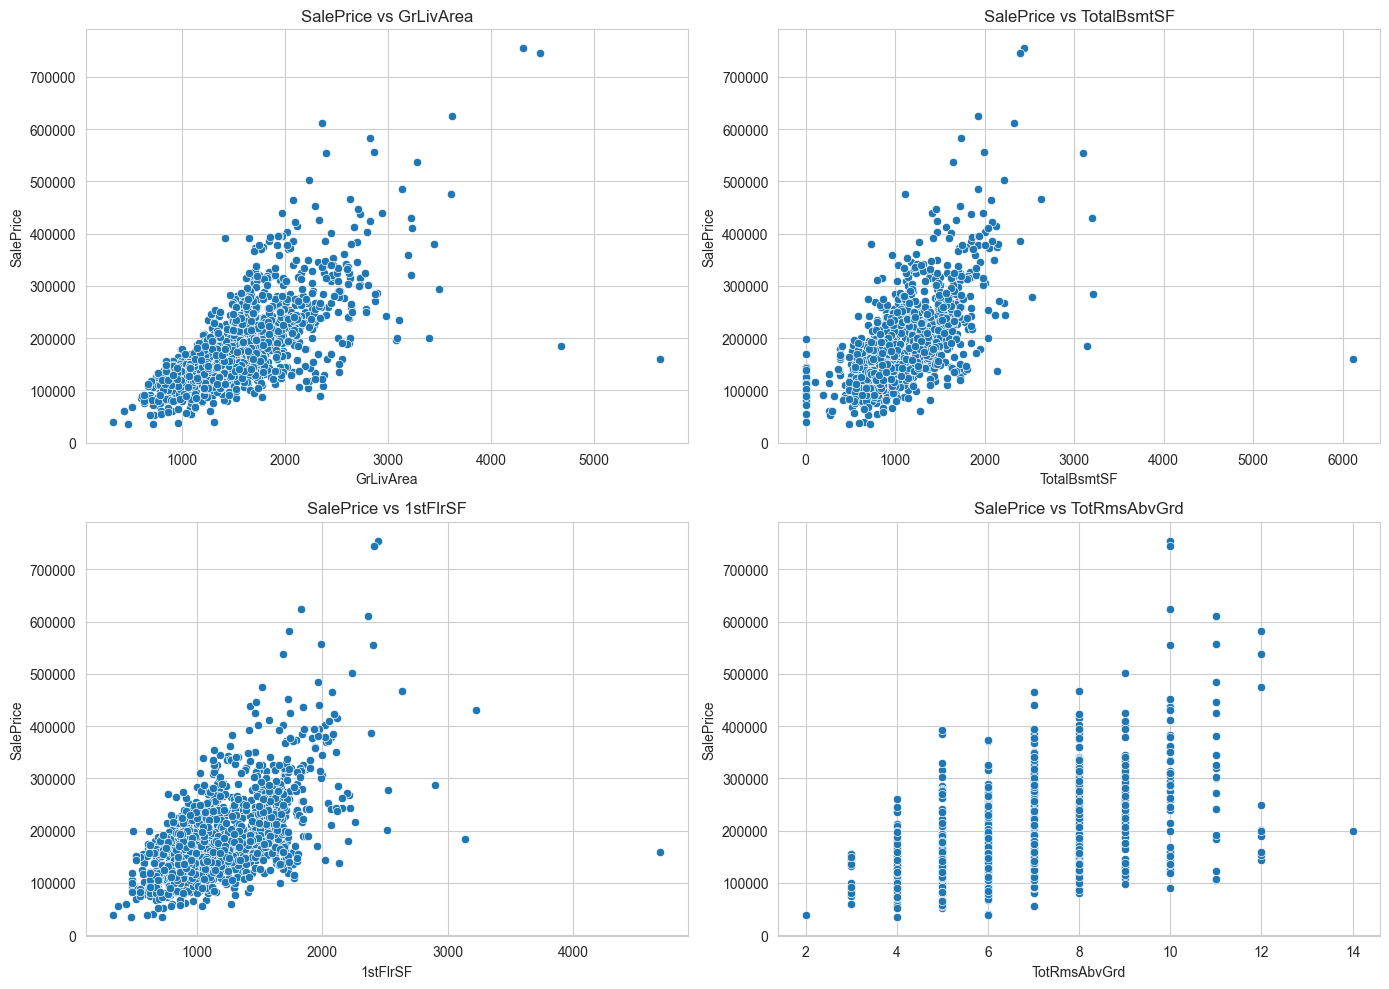

In [11]:
# Scatter plots for the selected features against SalePrice
features = ['GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'TotRmsAbvGrd']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

for i, feature in enumerate(features):
    sns.scatterplot(data=train_data, x=feature, y='SalePrice', ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'SalePrice vs {feature}')
    axes[i//2, i%2].set_xlabel(feature)
    axes[i//2, i%2].set_ylabel('SalePrice')

plt.tight_layout()
plt.show()


In [12]:

# Calculate IQR for SalePrice
Q1 = train['SalePrice'].quantile(0.25)
Q3 = train['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
outliers = train[(train['SalePrice'] < lower_bound) | (train['SalePrice'] > upper_bound)]

# Number of outliers detected
num_outliers = outliers.shape[0]

num_outliers


61

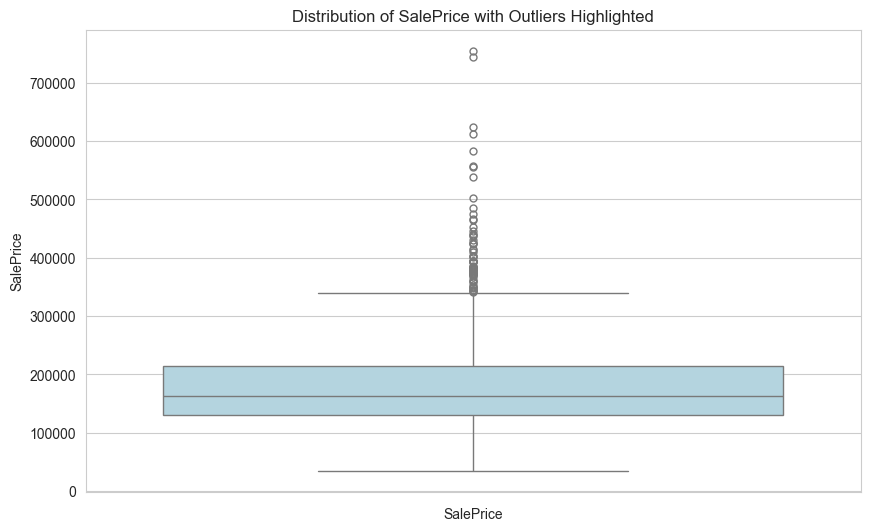

In [13]:
# Plotting the SalePrice distribution with outliers highlighted

plt.figure(figsize=(10, 6))
sns.boxplot(train['SalePrice'], color="lightblue", fliersize=5)
plt.title('Distribution of SalePrice with Outliers Highlighted')
plt.xlabel('SalePrice')
plt.show()


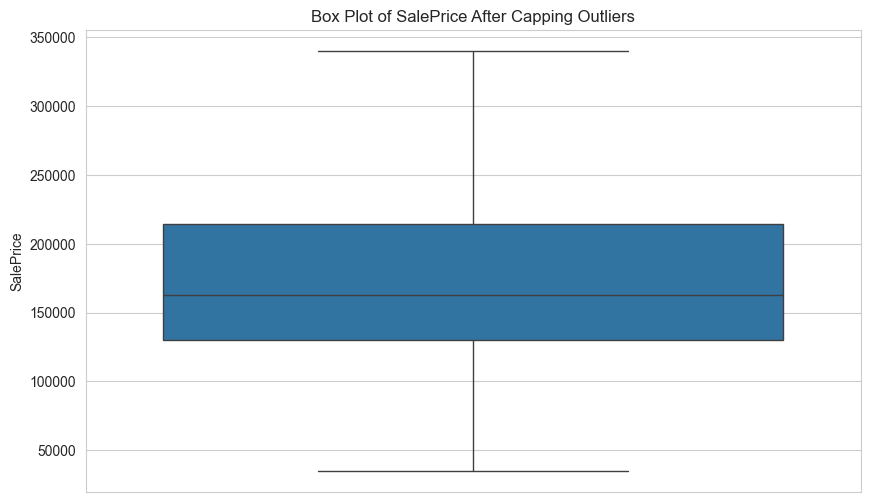

In [14]:
# Calculate the IQR for SalePrice
Q1 = train['SalePrice'].quantile(0.25)
Q3 = train['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

# Determine the upper threshold
upper_threshold = Q3 + 1.5 * IQR

# Cap values above the upper threshold
train['SalePrice'] = np.where(train['SalePrice'] > upper_threshold, upper_threshold, train['SalePrice'])

# Check the modified distribution of SalePrice
plt.figure(figsize=(10, 6))
sns.boxplot(train['SalePrice'])
plt.title('Box Plot of SalePrice After Capping Outliers')
plt.show()


In [15]:
# Identify outliers for all numerical columns using IQR method

outliers_dict = {}  # Dictionary to store number of outliers for each feature

# Iterate over numerical features
for col in train.select_dtypes(include=['float64', 'int64']).columns:
    # Skip the target variable
    if col == 'SalePrice':
        continue
    
    # Calculate IQR
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find outliers
    outliers = train[(train[col] < lower_bound) | (train[col] > upper_bound)]
    outliers_dict[col] = len(outliers)

outliers_dict


{'Id': 0,
 'MSSubClass': 103,
 'LotFrontage': 93,
 'LotArea': 69,
 'LotShape': 10,
 'Utilities': 1,
 'LandSlope': 78,
 'OverallQual': 2,
 'OverallCond': 125,
 'YearBuilt': 7,
 'YearRemodAdd': 0,
 'MasVnrArea': 98,
 'ExterQual': 0,
 'ExterCond': 178,
 'BsmtFinSF1': 7,
 'BsmtFinSF2': 167,
 'BsmtUnfSF': 29,
 'TotalBsmtSF': 61,
 'HeatingQC': 0,
 '1stFlrSF': 20,
 '2ndFlrSF': 2,
 'LowQualFinSF': 26,
 'GrLivArea': 31,
 'BsmtFullBath': 1,
 'BsmtHalfBath': 82,
 'FullBath': 0,
 'HalfBath': 0,
 'BedroomAbvGr': 35,
 'KitchenAbvGr': 68,
 'KitchenQual': 0,
 'TotRmsAbvGrd': 30,
 'Functional': 100,
 'Fireplaces': 5,
 'GarageYrBlt': 2,
 'GarageCars': 5,
 'GarageArea': 21,
 'PavedDrive': 120,
 'WoodDeckSF': 32,
 'OpenPorchSF': 77,
 'EnclosedPorch': 208,
 '3SsnPorch': 24,
 'ScreenPorch': 116,
 'PoolArea': 7,
 'MiscVal': 52,
 'MoSold': 0,
 'YrSold': 0}

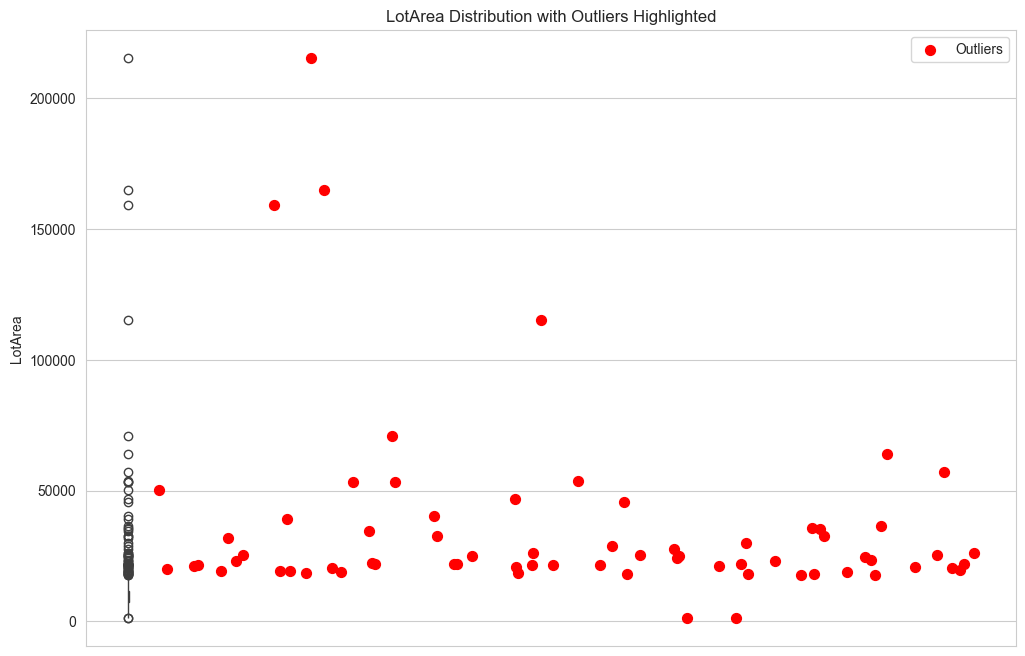

(69, 1481.5, 17673.5)

In [16]:
# Calculate the IQR for LotArea
Q1 = train['LotArea'].quantile(0.25)
Q3 = train['LotArea'].quantile(0.75)
IQR = Q3 - Q1

# Calculate boundaries
lower_boundary = Q1 - 1.5 * IQR
upper_boundary = Q3 + 1.5 * IQR

# Identify the outliers
outliers_lot_area = train[(train['LotArea'] < lower_boundary) | (train['LotArea'] > upper_boundary)]

# Plot the distribution with outliers highlighted
plt.figure(figsize=(12, 8))
sns.boxplot(train['LotArea'])
plt.scatter(outliers_lot_area.index, outliers_lot_area['LotArea'], color='red', s=50, label='Outliers')
plt.title('LotArea Distribution with Outliers Highlighted')
plt.legend()
plt.show()

outliers_lot_area.shape[0], lower_boundary, upper_boundary


In [17]:
# Capping the outliers for 'LotArea' feature correctly
train['LotArea'] = np.where(train['LotArea'] < lower_bound, lower_bound, 
                            np.where(train['LotArea'] > upper_bound, upper_bound, train['LotArea']))

# Re-check if outliers have been capped
outliers_after_corrected = ((train['LotArea'] < lower_bound) | (train['LotArea'] > upper_bound)).sum()

outliers_after_corrected


0

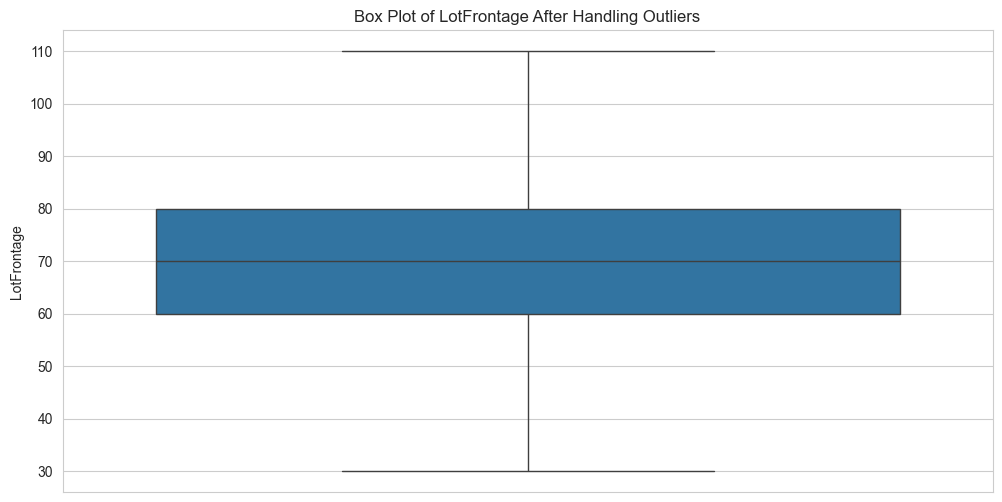

In [18]:
# Calculating IQR for LotFrontage
Q1 = train['LotFrontage'].quantile(0.25)
Q3 = train['LotFrontage'].quantile(0.75)
IQR = Q3 - Q1

# Defining bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Capping outliers
train['LotFrontage'] = np.where(train['LotFrontage'] < lower_bound, lower_bound,
                                np.where(train['LotFrontage'] > upper_bound, upper_bound, train['LotFrontage']))

# Visualizing after capping
plt.figure(figsize=(12, 6))
sns.boxplot(train['LotFrontage'])
plt.title('Box Plot of LotFrontage After Handling Outliers')
plt.show()


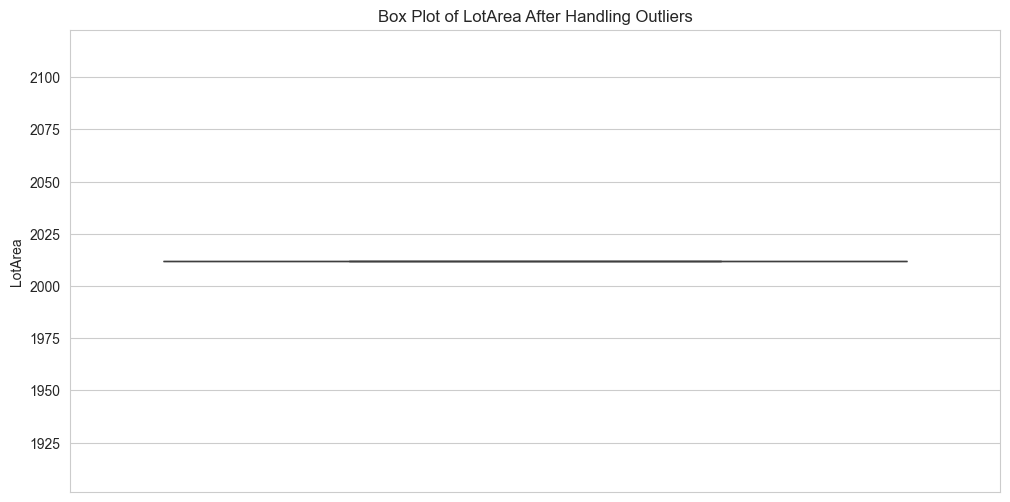

In [19]:
# Calculating IQR for LotArea
Q1_lotarea = train['LotArea'].quantile(0.25)
Q3_lotarea = train['LotArea'].quantile(0.75)
IQR_lotarea = Q3_lotarea - Q1_lotarea

# Defining bounds
lower_bound_lotarea = Q1_lotarea - 1.5 * IQR_lotarea
upper_bound_lotarea = Q3_lotarea + 1.5 * IQR_lotarea

# Capping outliers
train['LotArea'] = np.where(train['LotArea'] < lower_bound_lotarea, lower_bound_lotarea,
                            np.where(train['LotArea'] > upper_bound_lotarea, upper_bound_lotarea, train['LotArea']))

# Visualizing after capping
plt.figure(figsize=(12, 6))
sns.boxplot(train['LotArea'])
plt.title('Box Plot of LotArea After Handling Outliers')
plt.show()


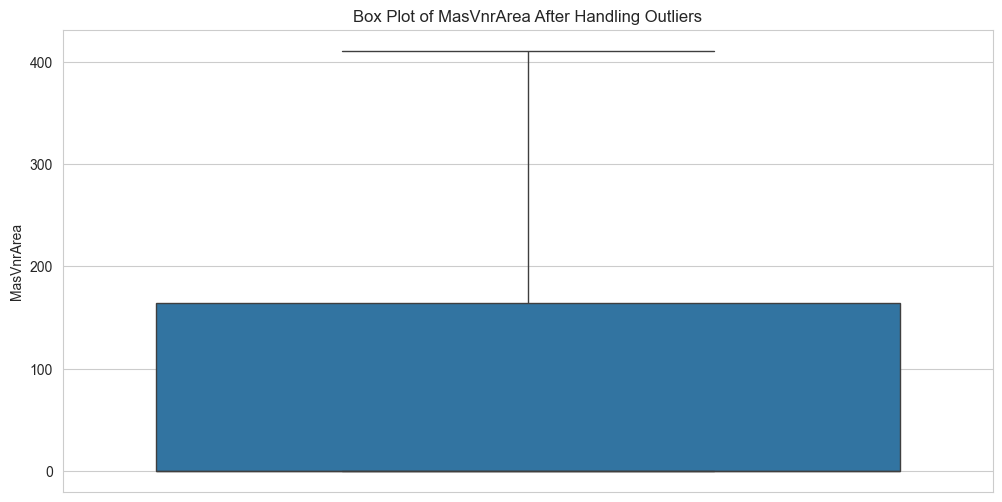

In [20]:
# Calculating IQR for MasVnrArea
Q1_masvnr = train['MasVnrArea'].quantile(0.25)
Q3_masvnr = train['MasVnrArea'].quantile(0.75)
IQR_masvnr = Q3_masvnr - Q1_masvnr

# Defining bounds
lower_bound_masvnr = Q1_masvnr - 1.5 * IQR_masvnr
upper_bound_masvnr = Q3_masvnr + 1.5 * IQR_masvnr

# Capping outliers
train['MasVnrArea'] = np.where(train['MasVnrArea'] < lower_bound_masvnr, lower_bound_masvnr,
                               np.where(train['MasVnrArea'] > upper_bound_masvnr, upper_bound_masvnr, train['MasVnrArea']))

# Visualizing after capping
plt.figure(figsize=(12, 6))
sns.boxplot(train['MasVnrArea'])
plt.title('Box Plot of MasVnrArea After Handling Outliers')
plt.show()


In [21]:
# List of features to handle outliers for
features_to_clean = ["BsmtFinSF1", "TotalBsmtSF", "1stFlrSF", "GarageArea", "OpenPorchSF", "WoodDeckSF"]

# Function to clean outliers using IQR
def cap_outliers_iqr(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[feature] = np.where(data[feature] < lower_bound, lower_bound, data[feature])
    data[feature] = np.where(data[feature] > upper_bound, upper_bound, data[feature])

# Applying the function on each feature
for feature in features_to_clean:
    cap_outliers_iqr(train, feature)

# Display summary statistics after cleaning
train[features_to_clean].describe()


BsmtFinSF1  TotalBsmtSF     1stFlrSF   GarageArea  OpenPorchSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean    439.997517  1050.254795  1157.018151   470.670719    42.603425   
std     433.219435   397.937878   362.583002   207.105729    52.501584   
min       0.000000    42.000000   334.000000     0.000000     0.000000   
25%       0.000000   795.750000   882.000000   334.500000     0.000000   
50%     383.500000   991.500000  1087.000000   480.000000    25.000000   
75%     712.250000  1298.250000  1391.250000   576.000000    68.000000   
max    1780.625000  2052.000000  2155.125000   938.250000   170.000000   

        WoodDeckSF  
count  1460.000000  
mean     91.806849  
std     116.658120  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%     168.000000  
max     420.000000

In [22]:
# Get categorical columns
categorical_cols = train.select_dtypes(include=['object']).columns

# Display the unique values for each categorical column to determine its nature (nominal or ordinal)
categorical_values = {col: train[col].unique() for col in categorical_cols}
categorical_values


{'MSZoning': array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object),
 'Street': array(['Pave', 'Grvl'], dtype=object),
 'Alley': array(['None', 'Grvl', 'Pave'], dtype=object),
 'LandContour': array(['Lvl', 'Bnk', 'Low', 'HLS'], dtype=object),
 'LotConfig': array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object),
 'Neighborhood': array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
        'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
        'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
        'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
        'Blueste'], dtype=object),
 'Condition1': array(['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA',
        'RRNe'], dtype=object),
 'Condition2': array(['Norm', 'Artery', 'RRNn', 'Feedr', 'PosN', 'PosA', 'RRAn', 'RRAe'],
       dtype=object),
 'BldgType': array(['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'], dtype=object),
 'HouseStyle': arra

In [23]:
# Ordinal encoding for ordinal variables
ordinal_mappings = {
    'ExterQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'ExterCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'BsmtQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    'BsmtCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    'BsmtExposure': {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0},
    'BsmtFinType1': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0},
    'HeatingQC': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'KitchenQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'Functional': {'Typ': 8, 'Min1': 7, 'Min2': 6, 'Mod': 5, 'Maj1': 4, 'Maj2': 3, 'Sev': 2, 'Sal': 1}
}

for col, mapping in ordinal_mappings.items():
    train[col] = train[col].map(mapping)

# One-hot encoding for nominal variables
train = pd.get_dummies(train, columns=['Electrical', 'GarageType'], drop_first=True)

# Checking if any categorical variables remain
remaining_categorical = train.select_dtypes(include=['object']).columns
remaining_categorical


Index(['MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'Foundation', 'BsmtFinType2', 'Heating', 'CentralAir', 'FireplaceQu',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [24]:
# Ordinal encoding for additional ordinal variables
additional_ordinal_mappings = {
    'FireplaceQu': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    'GarageFinish': {'Fin': 3, 'RFn': 2, 'Unf': 1, 'NA': 0},
    'GarageQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    'GarageCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    'PoolQC': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'NA': 0},
    'Fence': {'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1, 'NA': 0},
    'Street': {'Pave': 2, 'Grvl': 1},
    'Alley': {'Pave': 2, 'Grvl': 1, 'NA': 0},
    'CentralAir': {'Y': 1, 'N': 0}
}

for col, mapping in additional_ordinal_mappings.items():
    train[col] = train[col].map(mapping)

# One-hot encoding for the remaining nominal variables
nominal_features = list(set(remaining_categorical) - set(additional_ordinal_mappings.keys()))
train = pd.get_dummies(train, columns=nominal_features, drop_first=True)

# Checking if any categorical variables remain
remaining_categorical_final = train.select_dtypes(include=['object']).columns
remaining_categorical_final


Index([], dtype='object')

In [25]:
# Checking data types of all columns
non_numerical_columns = train.select_dtypes(exclude=['int64', 'float64']).columns

non_numerical_columns


Index(['Electrical_FuseF', 'Electrical_FuseP', 'Electrical_Mix',
       'Electrical_SBrkr', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_None',
       ...
       'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3',
       'LotConfig_Inside', 'BsmtFinType2_2', 'BsmtFinType2_3',
       'BsmtFinType2_4', 'BsmtFinType2_5', 'BsmtFinType2_6',
       'BsmtFinType2_None'],
      dtype='object', length=148)

In [26]:
# Converting the non-numerical columns to numeric
train[non_numerical_columns] = train[non_numerical_columns].astype('int64')

# Check again for any non-numerical columns
remaining_non_numerical = train.select_dtypes(exclude=['int64', 'float64']).columns

remaining_non_numerical


Index([], dtype='object')

In [27]:
# Extracting unique values for each column
unique_values = {col: train[col].unique() for col in train.columns}

# Displaying the unique values
unique_values


{'Id': array([   1,    2,    3, ..., 1458, 1459, 1460], dtype=int64),
 'MSSubClass': array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
        180,  40], dtype=int64),
 'LotFrontage': array([ 65. ,  80. ,  68. ,  60. ,  84. ,  85. ,  75. ,  51. ,  50. ,
         70. ,  71. ,  91. ,  73. ,  72. ,  66. , 101. ,  57. ,  44. ,
        110. ,  98. ,  47. , 108. ,  74. ,  66.5,  61. ,  48. ,  33. ,
         52. , 100. ,  30. ,  89. ,  63. ,  76. ,  81. ,  95. ,  69. ,
         32. ,  78. ,  40. , 105. ,  77. ,  64. ,  94. ,  34. ,  90. ,
         55. ,  88. ,  82. , 107. ,  92. ,  62. ,  86. ,  97. ,  73.5,
         54. ,  41. ,  79. ,  99. ,  67. ,  83. ,  43. , 103. ,  93. ,
         65.5,  35. ,  37. ,  87. ,  49. ,  96. ,  59. ,  36. ,  56. ,
        102. ,  58. ,  38. , 109. ,  53. ,  61.5,  45. , 106. , 104. ,
         42. ,  39. ,  88.5,  46. ]),
 'LotArea': array([2012.]),
 'Street': array([2, 1], dtype=int64),
 'Alley': array([nan,  1.,  2.]),
 'LotShape': arra

In [28]:
# Finding missing values in the dataset
missing_data = train.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)

missing_data


ExterQual       1460
ExterCond       1460
BsmtQual        1460
BsmtCond        1460
BsmtExposure    1460
BsmtFinType1    1460
HeatingQC       1460
KitchenQual     1460
Functional      1460
FireplaceQu     1460
GarageFinish    1460
GarageQual      1460
GarageCond      1460
PoolQC          1460
Fence           1460
Alley           1369
dtype: int64

In [29]:
# Drop the columns that have been encoded but not dropped
train.drop(columns=['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 
                    'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 
                    'PoolQC', 'Fence'], inplace=True)

# Fill the NaN values in Alley column
train['Alley'].fillna(0, inplace=True)

# Check again for missing values
missing_data_final = train.isnull().sum()
missing_data_final = missing_data_final[missing_data_final > 0]

missing_data_final


Series([], dtype: int64)

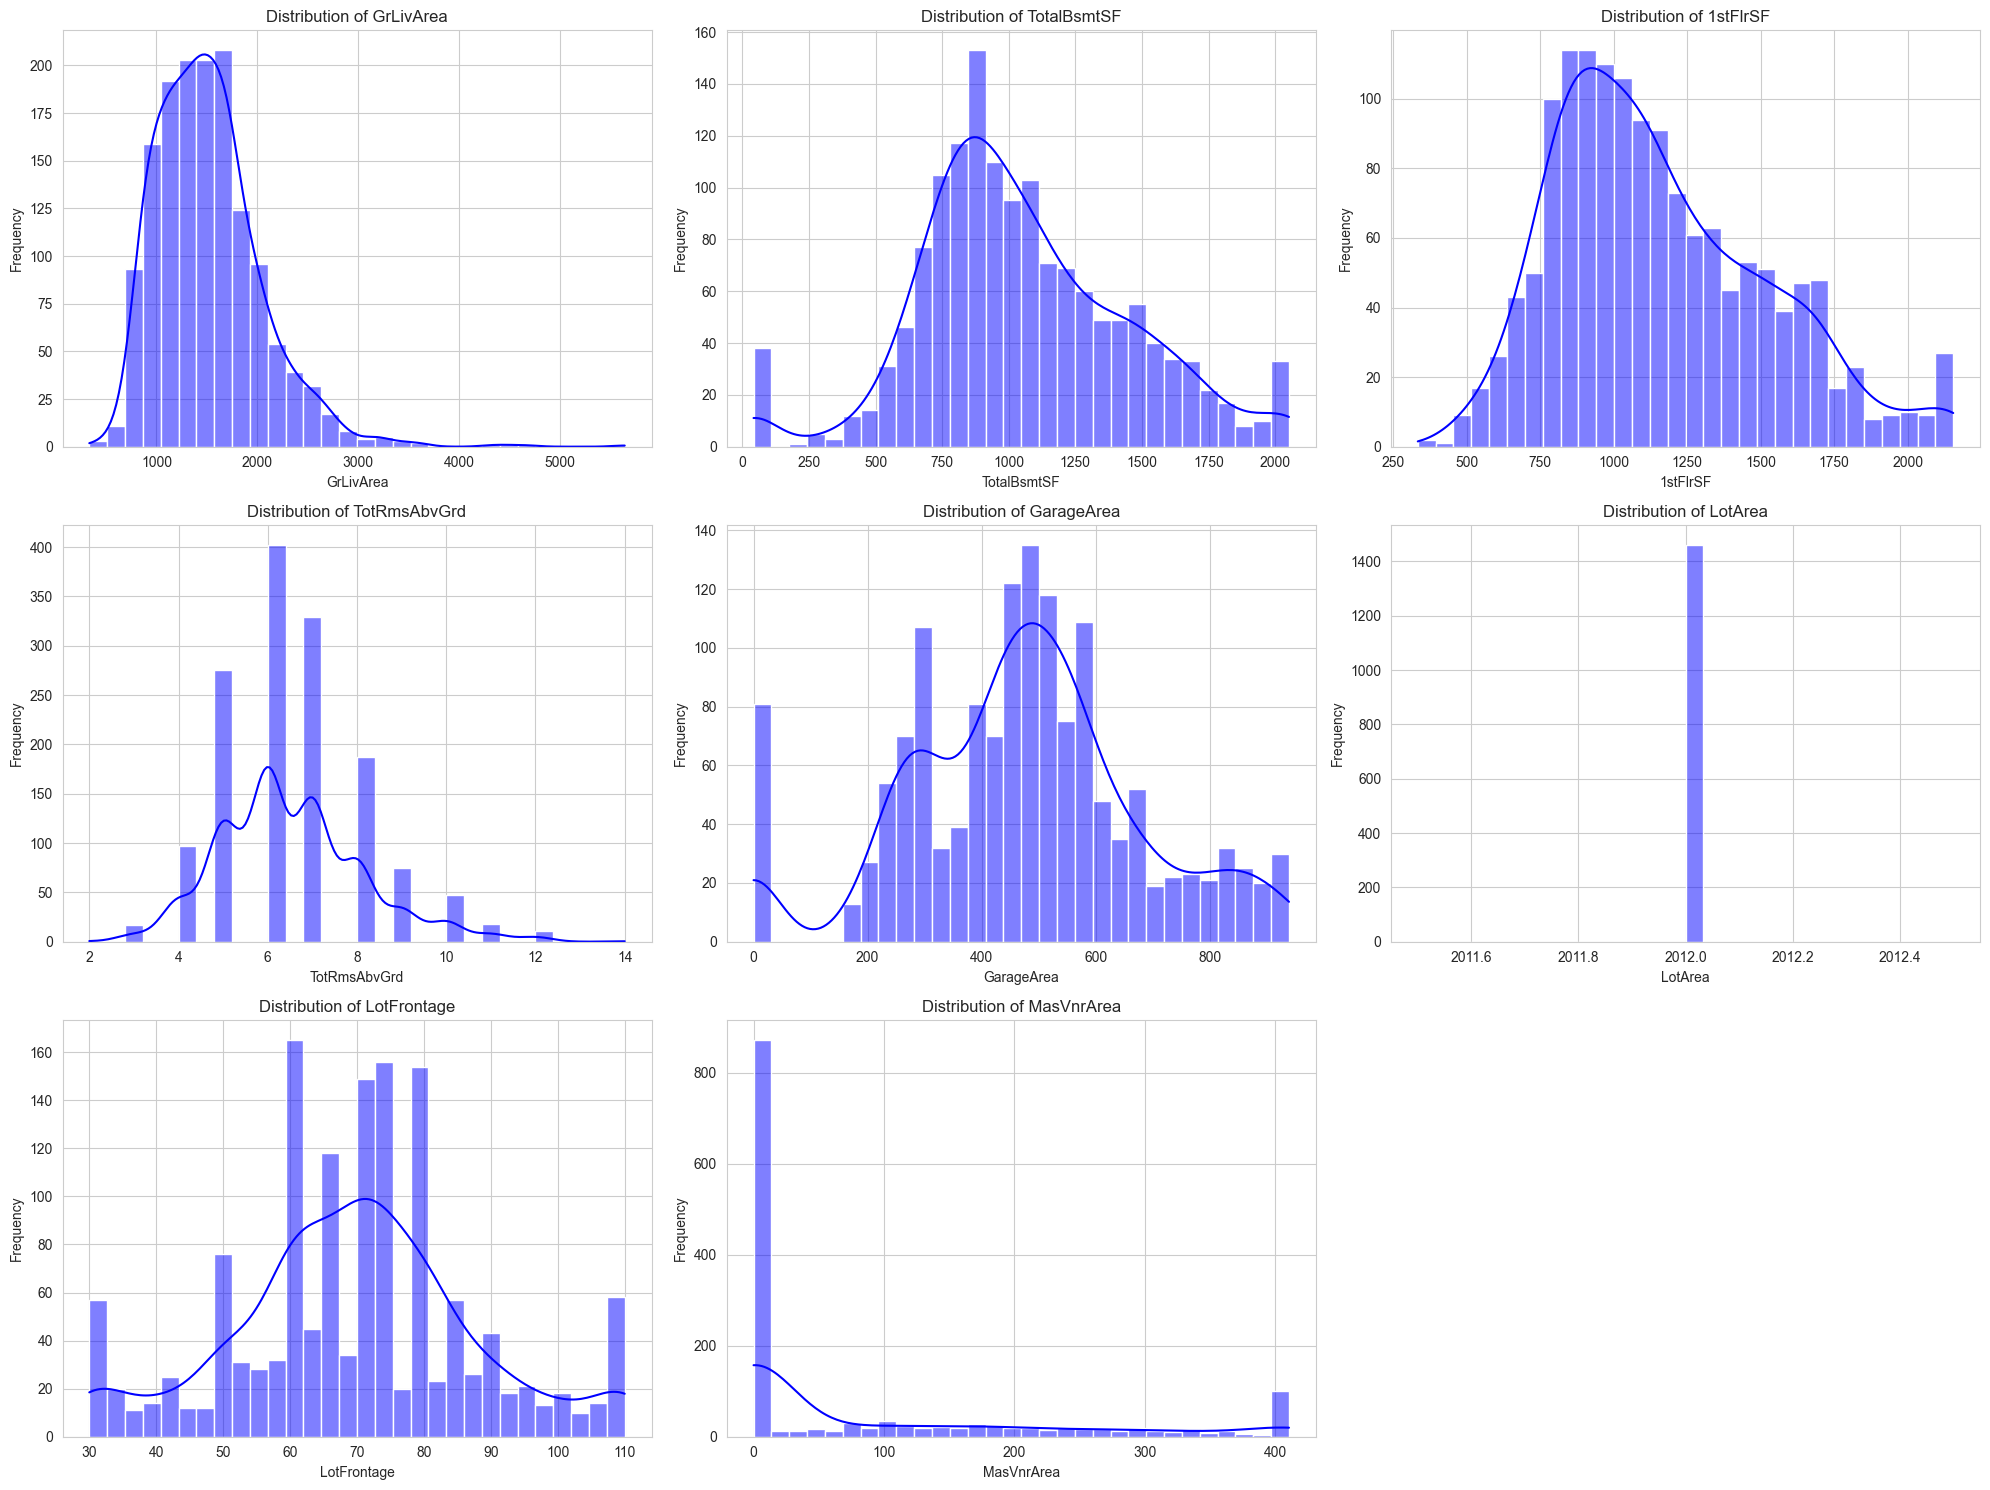

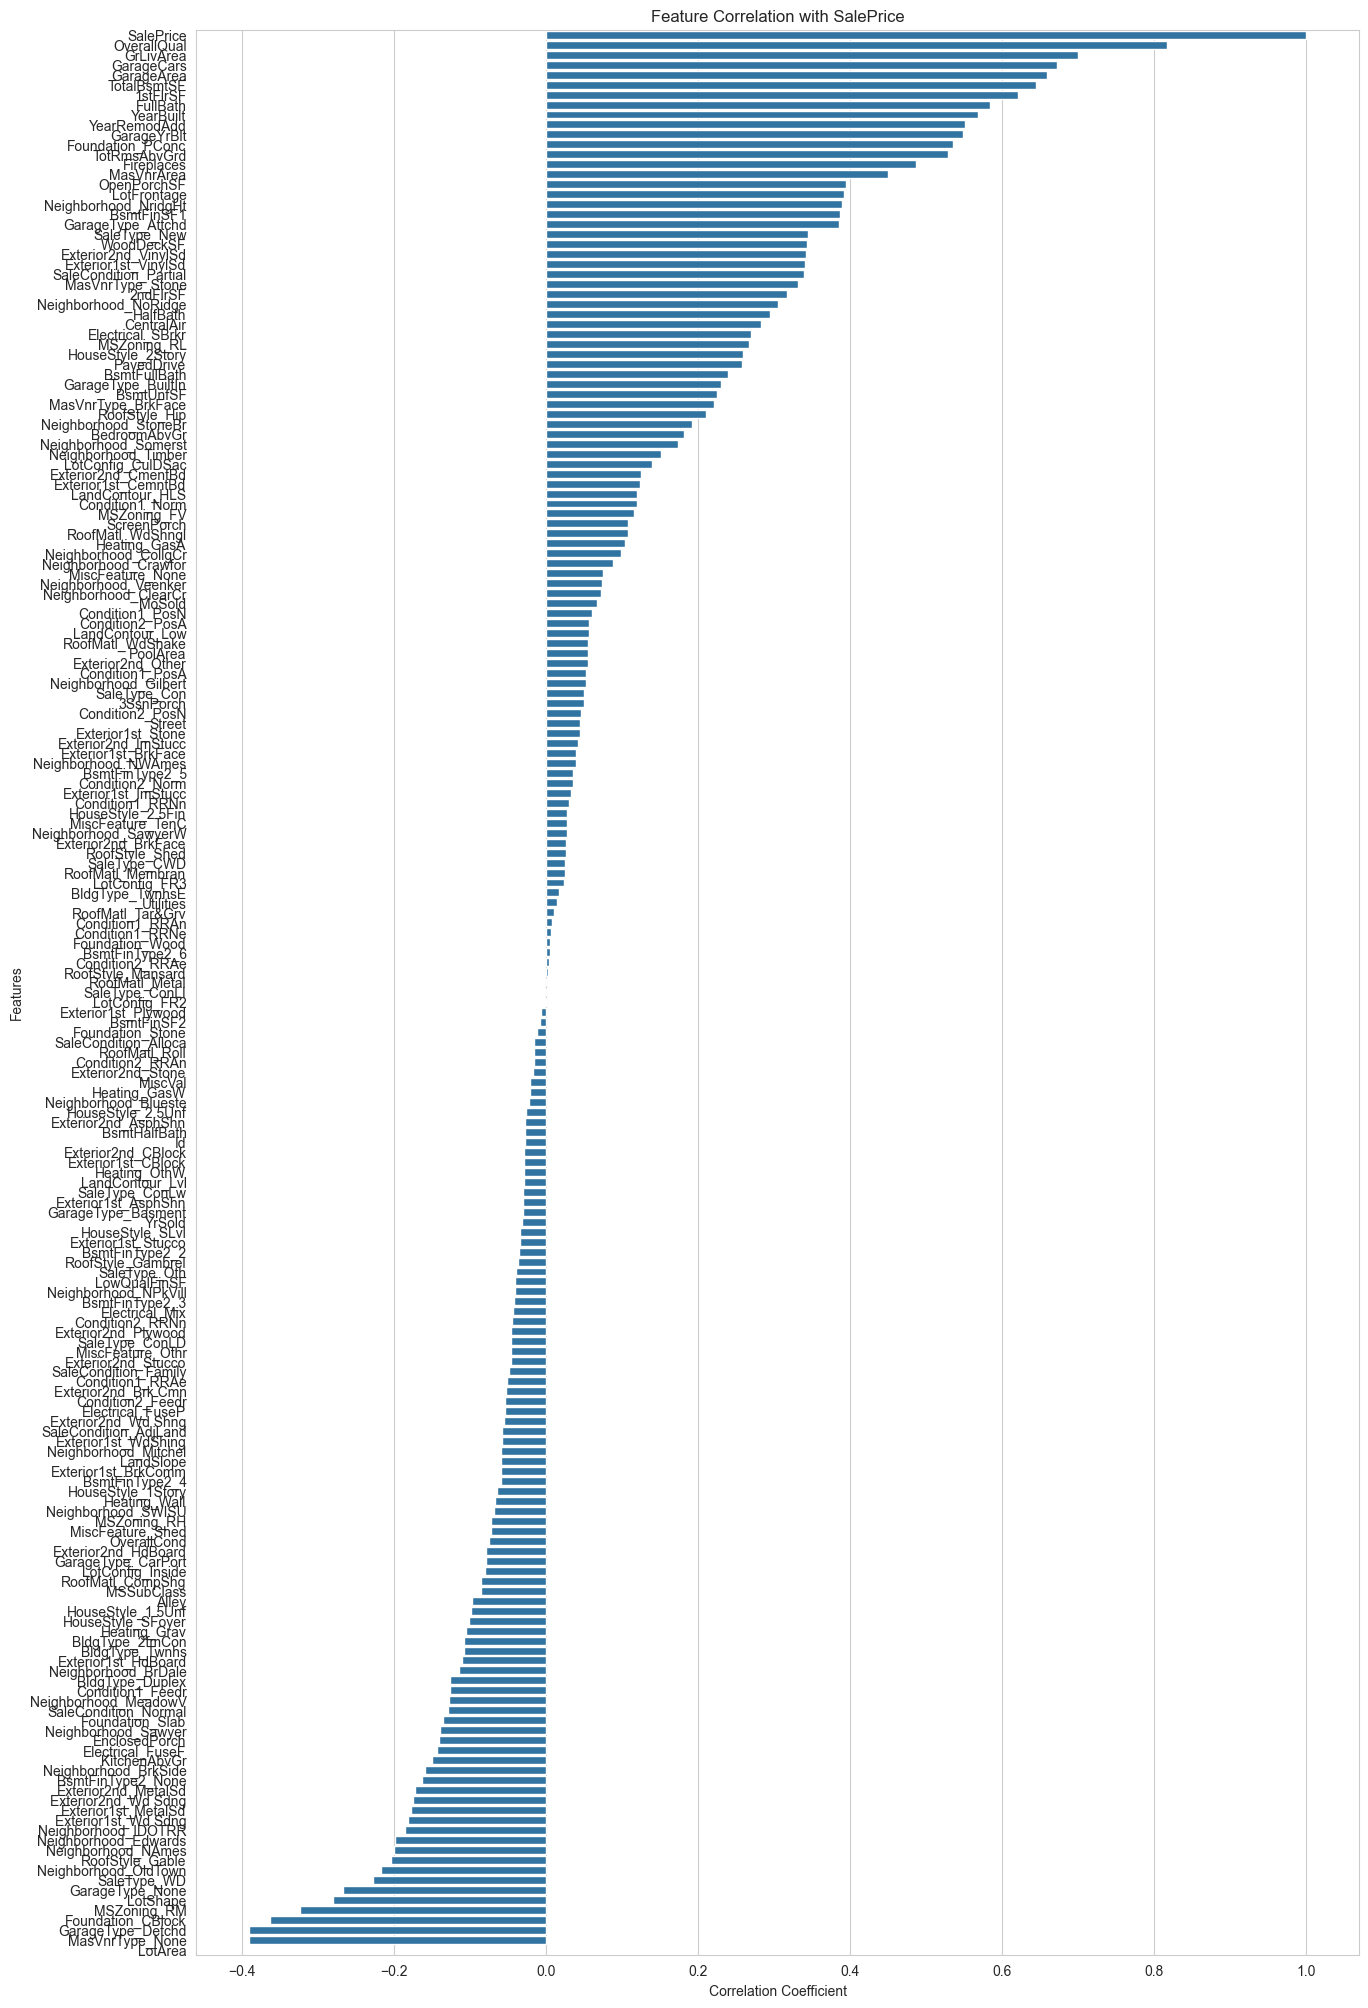

SalePrice            1.000000
OverallQual          0.816856
GrLivArea            0.699980
GarageCars           0.672293
GarageArea           0.660029
                       ...   
MSZoning_RM         -0.323491
Foundation_CBlock   -0.362833
GarageType_Detchd   -0.389651
MasVnrType_None     -0.390085
LotArea                   NaN
Name: SalePrice, Length: 193, dtype: float64

In [30]:
# Exploratory Data Analysis

# Distribution of main features
main_features = ['GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'TotRmsAbvGrd', 'GarageArea', 'LotArea', 'LotFrontage', 'MasVnrArea']
plt.figure(figsize=(20, 15))

for i, feature in enumerate(main_features):
    plt.subplot(3, 3, i+1)
    sns.histplot(train[feature], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Correlation with SalePrice
correlation_with_saleprice = train.corr()['SalePrice'].sort_values(ascending=False)
plt.figure(figsize=(15, 25))
sns.barplot(x=correlation_with_saleprice.values, y=correlation_with_saleprice.index)
plt.title('Feature Correlation with SalePrice')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

correlation_with_saleprice


In [31]:
# 1. Polynomial Features
train['GrLivArea_Sq'] = train['GrLivArea'] ** 2
train['TotalBsmtSF_Sq'] = train['TotalBsmtSF'] ** 2
train['1stFlrSF_Sq'] = train['1stFlrSF'] ** 2
train['GarageArea_Sq'] = train['GarageArea'] ** 2

# 2. Log Transformation
for column in ['GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'GarageArea', 'LotArea', 'LotFrontage', 'MasVnrArea']:
    train[column] = np.log1p(train[column])

# 3. Binning
# Binning YearBuilt and YearRemodAdd into decades
train['DecadeBuilt'] = (train['YearBuilt'] // 10) * 10
train['DecadeRemod'] = (train['YearRemodAdd'] // 10) * 10

# Removing original columns to avoid multicollinearity
train.drop(columns=['YearBuilt', 'YearRemodAdd'], inplace=True)

# Return the first few rows of the modified dataframe
train.head()


C:\Users\asad1\AppData\Local\Temp\ipykernel_26424\2439655777.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train['GrLivArea_Sq'] = train['GrLivArea'] ** 2
C:\Users\asad1\AppData\Local\Temp\ipykernel_26424\2439655777.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train['TotalBsmtSF_Sq'] = train['TotalBsmtSF'] ** 2
C:\Users\asad1\AppData\Local\Temp\ipykernel_26424\2439655777.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performa

Id  MSSubClass  LotFrontage   LotArea  Street  Alley  LotShape  Utilities  \
0   1          60     4.189655  7.607381       2    0.0         4          4   
1   2          20     4.394449  7.607381       2    0.0         4          4   
2   3          60     4.234107  7.607381       2    0.0         3          4   
3   4          70     4.110874  7.607381       2    0.0         3          4   
4   5          60     4.442651  7.607381       2    0.0         3          4   

   LandSlope  OverallQual  ...  BsmtFinType2_4  BsmtFinType2_5  \
0          3            7  ...               0               0   
1          3            6  ...               0               0   
2          3            7  ...               0               0   
3          3            7  ...               0               0   
4          3            8  ...               0               0   

   BsmtFinType2_6  BsmtFinType2_None  GrLivArea_Sq  TotalBsmtSF_Sq  \
0               0                  0       2924100        732736.0   
1               0                  0       1592644       1592644.0   
2               0                  0       3189796        846400.0   
3               0                  0       2948089        571536.0   
4               0                  0       4831204       1311025.0   

   1stFlrSF_Sq  GarageArea_Sq  DecadeBuilt  DecadeRemod  
0     732736.0       300304.0         2000         2000  
1    1592644.0       211600.0         1970         1970  
2     846400.0       369664.0         2000         2000  
3     923521.0       412164.0         1910         1970  
4    1311025.0       698896.0         2000         2000  

[5 rows x 197 columns]

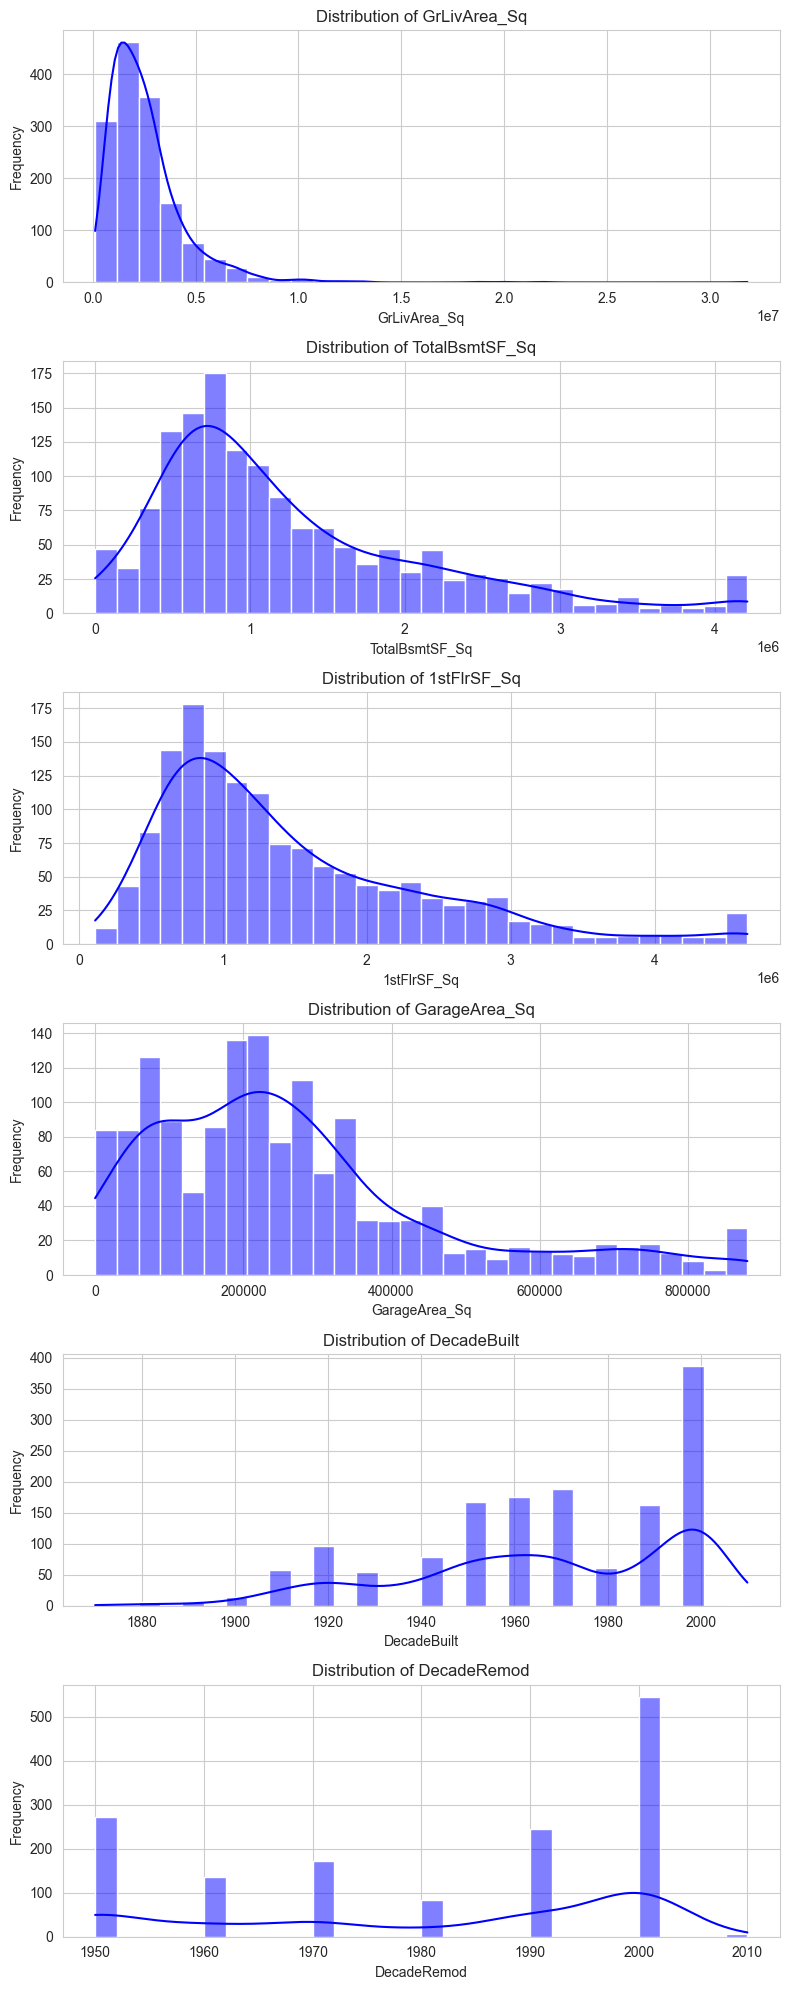

In [32]:
# Visualizing the distribution of newly created features

# Newly created features from previous feature engineering steps
new_features = ['GrLivArea_Sq', 'TotalBsmtSF_Sq', '1stFlrSF_Sq', 'GarageArea_Sq', 'DecadeBuilt', 'DecadeRemod']

# Plotting distributions
fig, axes = plt.subplots(nrows=len(new_features), figsize=(8, 20))

for i, feature in enumerate(new_features):
    sns.histplot(train[feature], ax=axes[i], bins=30, kde=True, color="blue")
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [33]:
# Calculate correlation of new features with SalePrice
correlation_with_saleprice = train[new_features + ['SalePrice']].corr()['SalePrice'].sort_values(ascending=False)

correlation_with_saleprice


SalePrice         1.000000
GarageArea_Sq     0.660190
TotalBsmtSF_Sq    0.656559
1stFlrSF_Sq       0.619165
GrLivArea_Sq      0.606543
DecadeBuilt       0.561885
DecadeRemod       0.536574
Name: SalePrice, dtype: float64

In [34]:
from sklearn.preprocessing import PolynomialFeatures

# Selecting top 5 numerical features most correlated with SalePrice
top_features = correlation_with_saleprice.abs().sort_values(ascending=False).head(6).index[1:]  # Excluding SalePrice itself

# Creating polynomial and interaction features for the top features
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
poly_features = poly.fit_transform(train[top_features])
poly_feature_names = poly.get_feature_names_out(input_features=top_features)


# Creating a DataFrame for the polynomial features
poly_df = pd.DataFrame(poly_features, columns=poly_feature_names)

# Dropping the original features from the polynomial DataFrame as they already exist in the main DataFrame
poly_df = poly_df.drop(columns=top_features)

# Concatenating the polynomial features to the original dataset
train_poly = pd.concat([train, poly_df], axis=1)

# Displaying the first few rows of the dataset with the polynomial features
train_poly.head()

train = train_poly


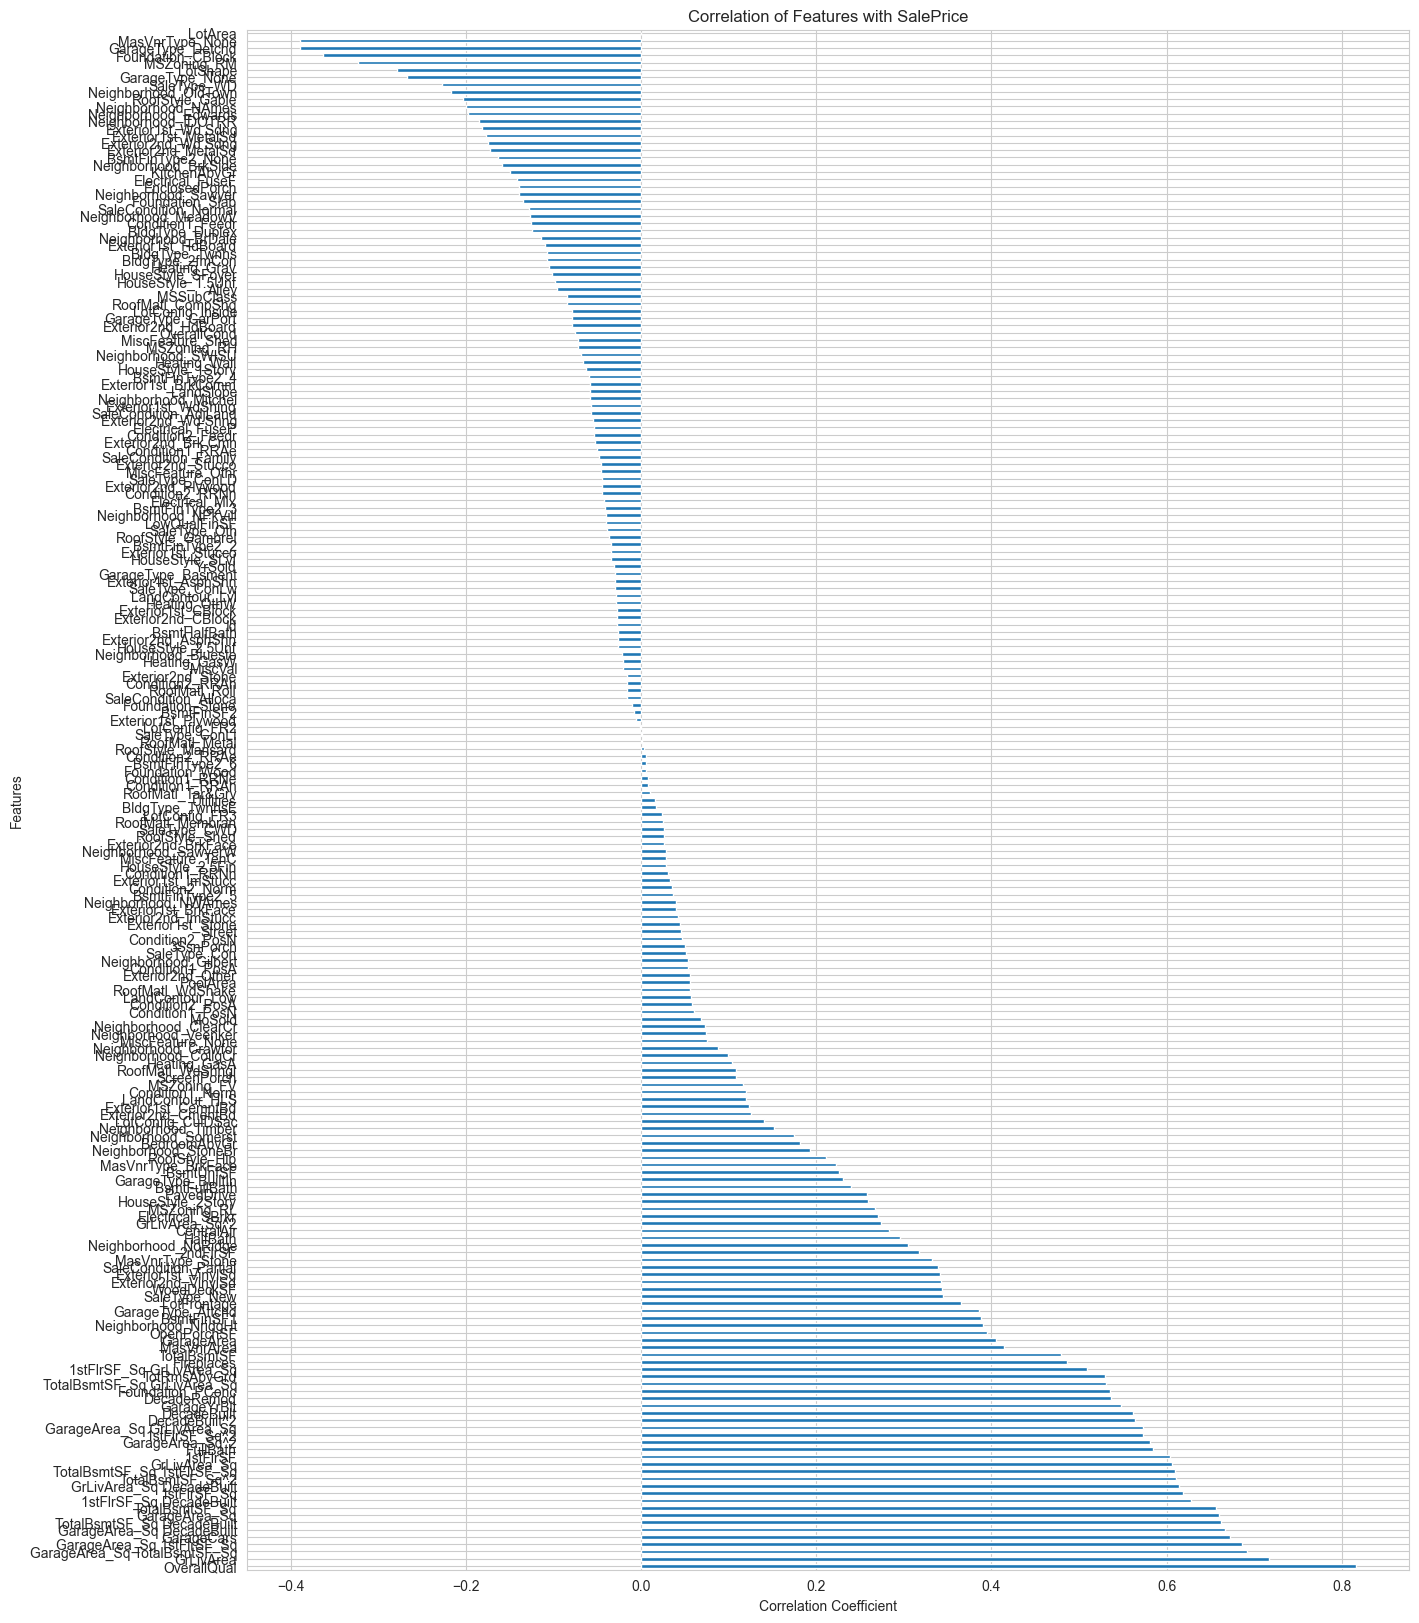

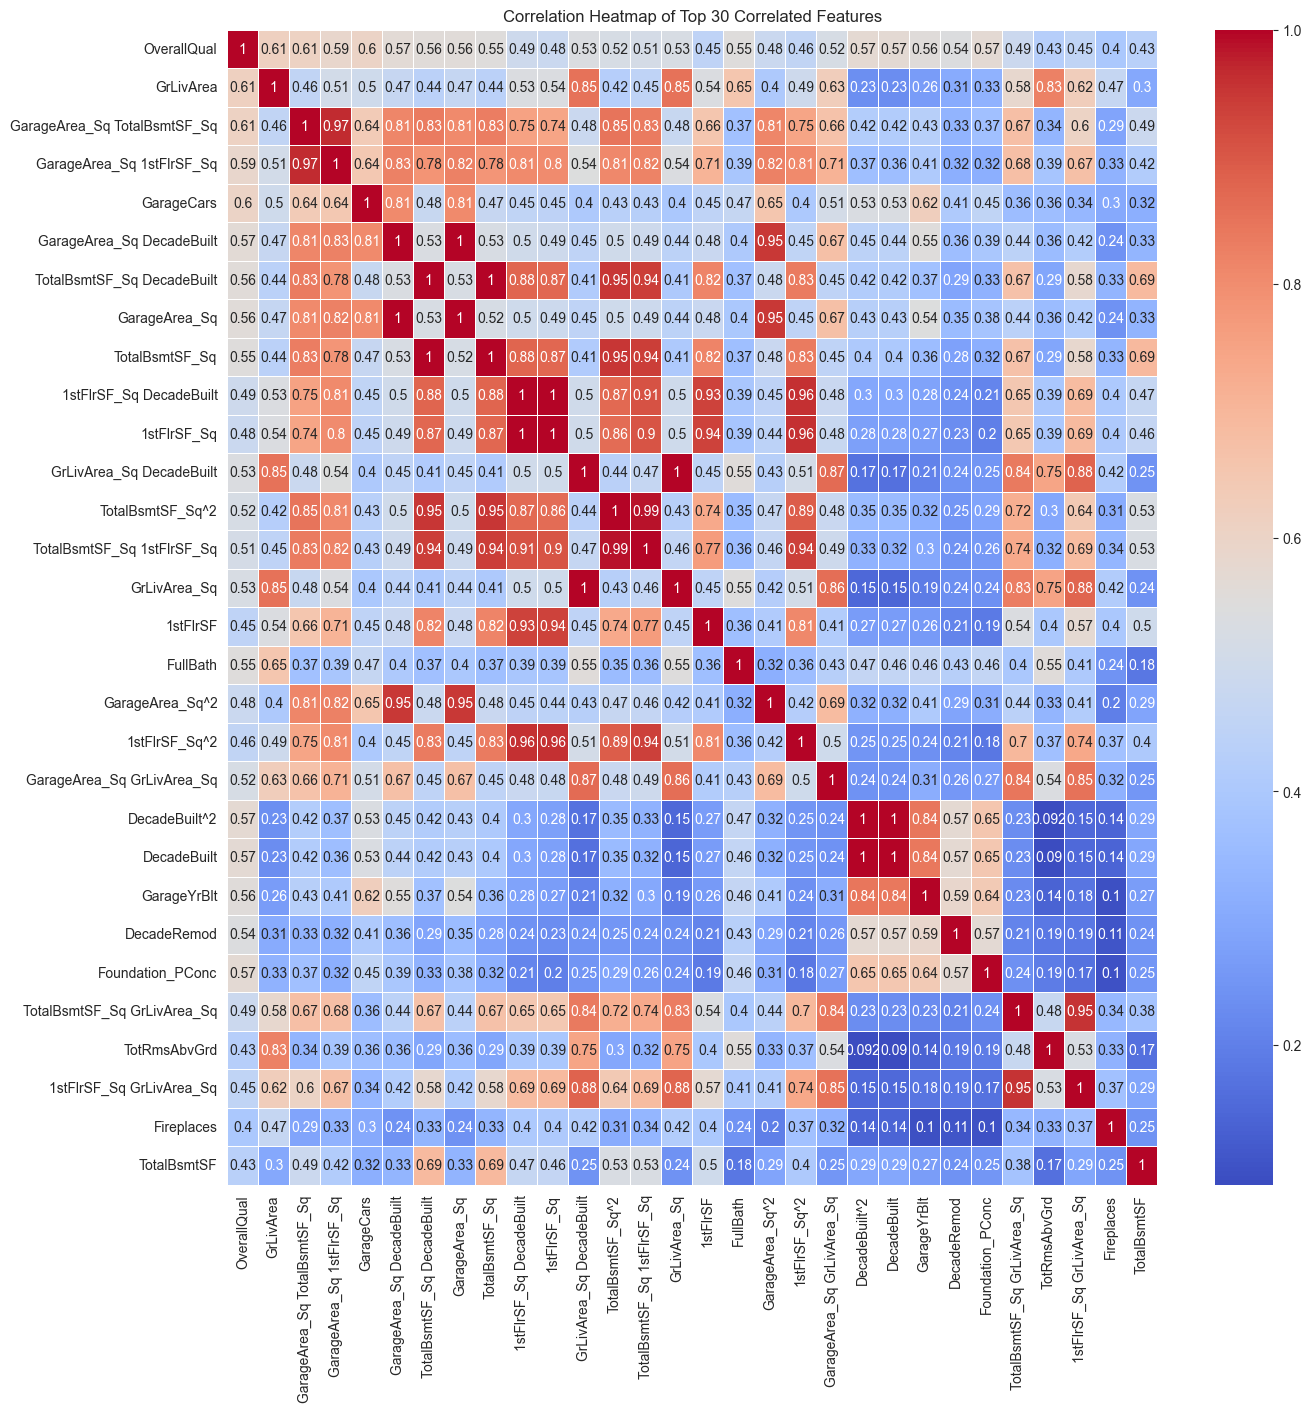

OverallQual                     0.816856
GrLivArea                       0.717018
GarageArea_Sq TotalBsmtSF_Sq    0.691855
GarageArea_Sq 1stFlrSF_Sq       0.686409
GarageCars                      0.672293
                                  ...   
MSZoning_RM                    -0.323491
Foundation_CBlock              -0.362833
GarageType_Detchd              -0.389651
MasVnrType_None                -0.390085
LotArea                              NaN
Name: SalePrice, Length: 211, dtype: float64

In [35]:
# Correlation of each feature with the target variable 'SalePrice'
correlation_with_target = train.corr()['SalePrice'].sort_values(ascending=False)

# Dropping 'SalePrice' from the correlation results
correlation_with_target = correlation_with_target.drop('SalePrice')

# Visualizing the correlation using a bar plot
plt.figure(figsize=(15, 20))
correlation_with_target.plot(kind='barh')
plt.title('Correlation of Features with SalePrice')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

# Visualizing the correlation matrix using a heatmap for the top correlated features
top_correlated_features = correlation_with_target.index[:30]  # Top 30 features
correlation_matrix = train[top_correlated_features].corr()

plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Top 30 Correlated Features')
plt.show()

correlation_with_target


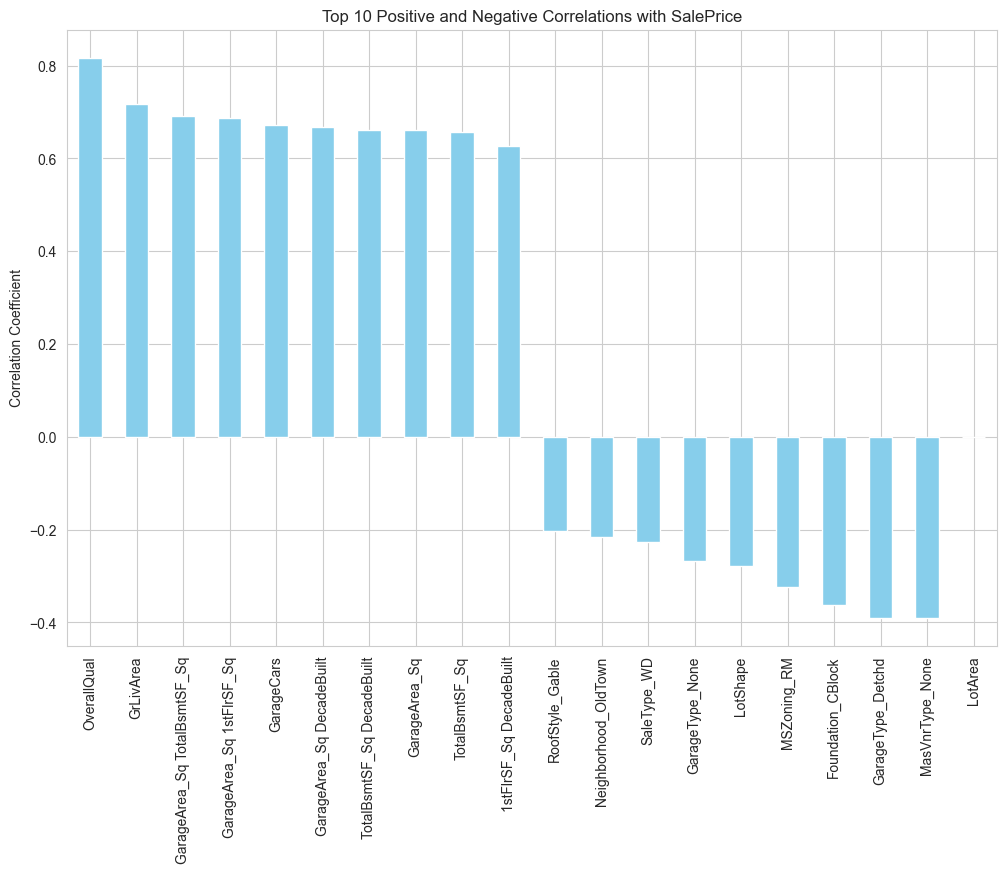

OverallQual                     0.816856
GrLivArea                       0.717018
GarageArea_Sq TotalBsmtSF_Sq    0.691855
GarageArea_Sq 1stFlrSF_Sq       0.686409
GarageCars                      0.672293
GarageArea_Sq DecadeBuilt       0.666924
TotalBsmtSF_Sq DecadeBuilt      0.662138
GarageArea_Sq                   0.660190
TotalBsmtSF_Sq                  0.656559
1stFlrSF_Sq DecadeBuilt         0.627642
RoofStyle_Gable                -0.203719
Neighborhood_OldTown           -0.216855
SaleType_WD                    -0.227458
GarageType_None                -0.267004
LotShape                       -0.279291
MSZoning_RM                    -0.323491
Foundation_CBlock              -0.362833
GarageType_Detchd              -0.389651
MasVnrType_None                -0.390085
LotArea                              NaN
Name: SalePrice, dtype: float64

In [36]:
# Calculate the correlation of each feature with 'SalePrice'
correlation = train.corr()['SalePrice'].sort_values(ascending=False)

# Drop 'SalePrice' correlation with itself
correlation = correlation.drop('SalePrice')

# Display the features with the highest correlation (positive and negative) with 'SalePrice'
top_correlation = pd.concat([correlation.head(10), correlation.tail(10)])

# Visualize the top correlated features
plt.figure(figsize=(12, 8))
top_correlation.plot(kind='bar', color='skyblue')
plt.title('Top 10 Positive and Negative Correlations with SalePrice')
plt.ylabel('Correlation Coefficient')
plt.show()

top_correlation


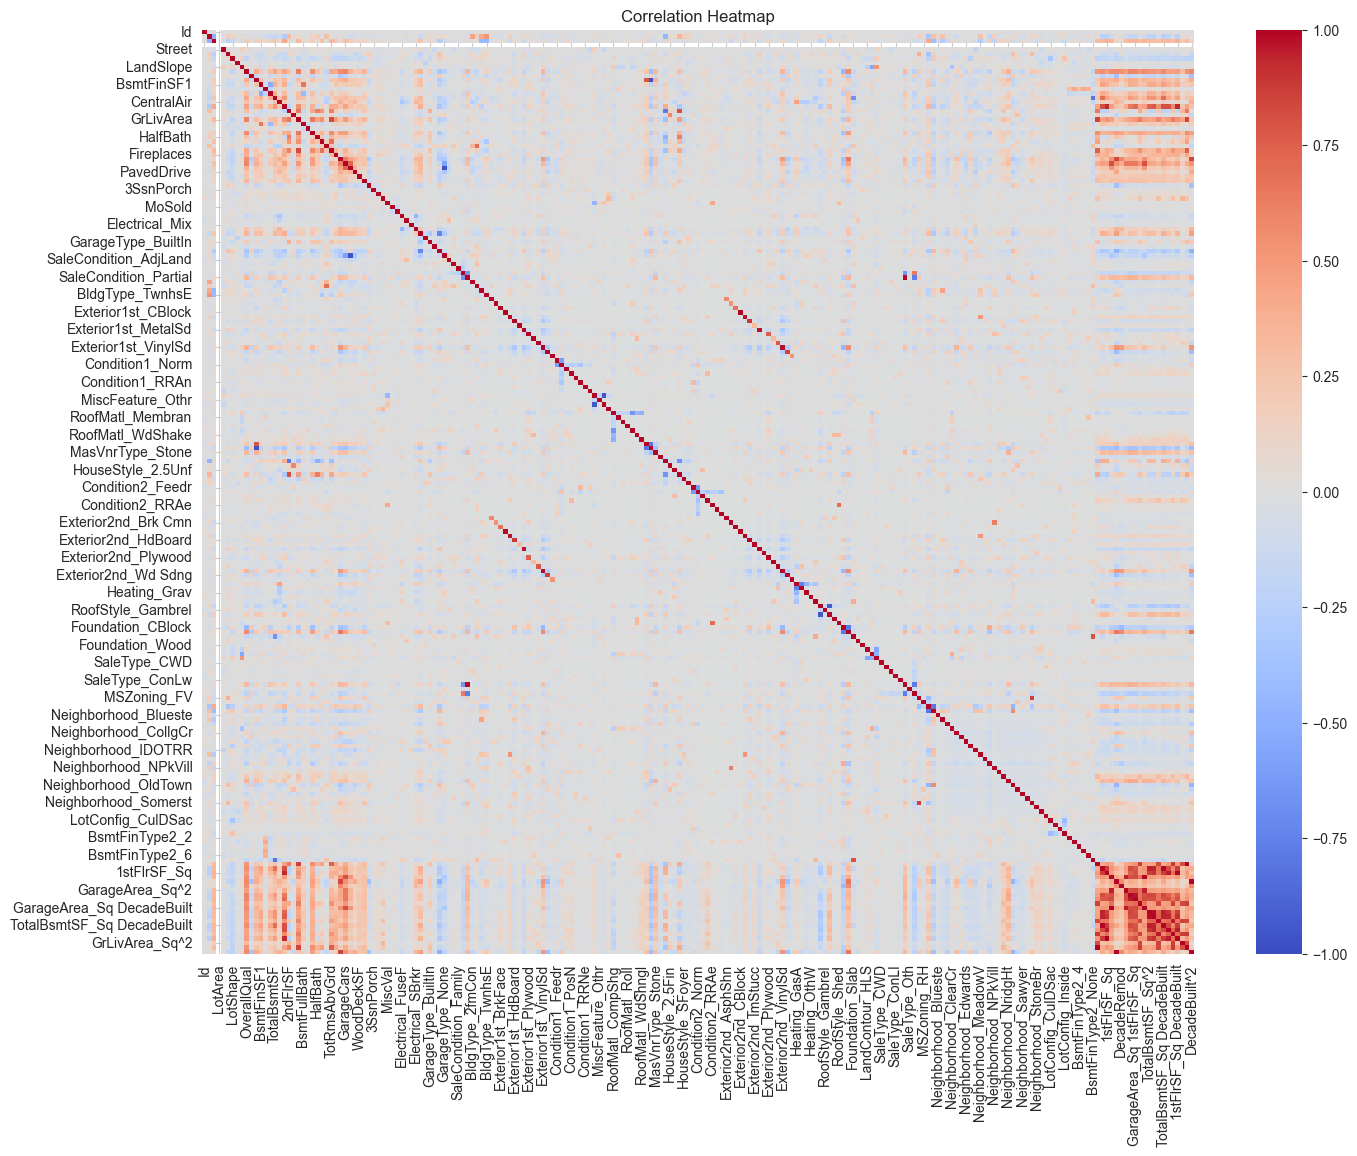

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = train.drop('SalePrice', axis=1).corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', vmax=1, vmin=-1)
plt.title('Correlation Heatmap')
plt.show()


In [38]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Splitting the data into features and target variable
X = train.drop(columns=['SalePrice'])
y = train['SalePrice']

# Initialize a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
feature_importances = rf.feature_importances_

# Creating a DataFrame for feature importances
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sorting the features based on importance
sorted_features = features_df.sort_values(by='Importance', ascending=False)

sorted_features.head(20)


Feature  Importance
9                     OverallQual    0.404094
203   TotalBsmtSF_Sq GrLivArea_Sq    0.327961
199    GarageArea_Sq GrLivArea_Sq    0.062742
206      1stFlrSF_Sq GrLivArea_Sq    0.027143
12                     BsmtFinSF1    0.010771
209      GrLivArea_Sq DecadeBuilt    0.008828
14                      BsmtUnfSF    0.008726
10                    OverallCond    0.007590
198     GarageArea_Sq 1stFlrSF_Sq    0.007525
197  GarageArea_Sq TotalBsmtSF_Sq    0.006538
194                   DecadeBuilt    0.006321
29                    GarageYrBlt    0.006288
18                       2ndFlrSF    0.005430
195                   DecadeRemod    0.005287
30                     GarageCars    0.004744
0                              Id    0.004305
210                 DecadeBuilt^2    0.004226
28                     Fireplaces    0.004213
2                     LotFrontage    0.004029
33                     WoodDeckSF    0.003645

In [39]:
# Selecting the top 30 features
top_30_features = sorted_features['Feature'].head(30).tolist()

# Keeping only the top 30 features in the train dataset
train = train[top_30_features + ['SalePrice']]



In [40]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = train.drop(columns=['SalePrice'])
y = train['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1168, 30), (292, 30), (1168,), (292,))

In [41]:


X_train.to_csv("X_train.csv")
X_test.to_csv("X_test.csv")
y_train.to_csv("y_train.csv")
y_test.to_csv("y_test.csv")


In [42]:
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Load the data
X_train = pd.read_csv("X_train.csv", index_col=0)
X_test = pd.read_csv("X_test.csv", index_col=0)
y_train = pd.read_csv("y_train.csv", index_col=0).squeeze()
y_test = pd.read_csv("y_test.csv", index_col=0).squeeze()

# Update the models dictionary to include new models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": xgb.XGBRegressor(objective='reg:squarederror'),
    "LightGBM": lgb.LGBMRegressor(),
    "AdaBoost": AdaBoostRegressor()
}

# Evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = [mae, mse, rmse, r2]

# Update the results DataFrame
results_df = pd.DataFrame(results, index=["MAE", "MSE", "RMSE", "R2"]).T
results_df


c:\Users\asad1\OneDrive\Desktop\ABB Proj\houseprices_env\Lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=3.16602e-30): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\asad1\OneDrive\Desktop\ABB Proj\houseprices_env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.844e+11, tolerance: 5.158e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\asad1\OneDrive\Desktop\ABB Proj\houseprices_env\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\asad1\OneDrive\Desktop\ABB Proj\houseprices_env\Lib\site-packages\xgboost\data.py:338: FutureW

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000402 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4052
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 30
[LightGBM] [Info] Start training from score 178189.621575


MAE           MSE          RMSE        R2
Linear Regression  16679.046674  4.696910e+08  21672.356177  0.903934
Ridge              16577.881845  4.712328e+08  21707.896862  0.903619
Lasso              16639.285195  4.772759e+08  21846.645675  0.902383
Decision Tree      21397.592466  8.909252e+08  29848.370912  0.817779
Random Forest      15138.122346  4.817995e+08  21949.931275  0.901457
Gradient Boosting  15026.483570  4.324508e+08  20795.450401  0.911551
XGBoost            15508.458958  4.954350e+08  22258.368825  0.898669
LightGBM           14365.461180  4.362609e+08  20886.858800  0.910771
AdaBoost           20324.493233  6.974005e+08  26408.340994  0.857360

C:\Users\asad1\AppData\Local\Temp\ipykernel_28404\1006554028.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=sorted_df.index, y=sorted_df[metric], palette=colors)


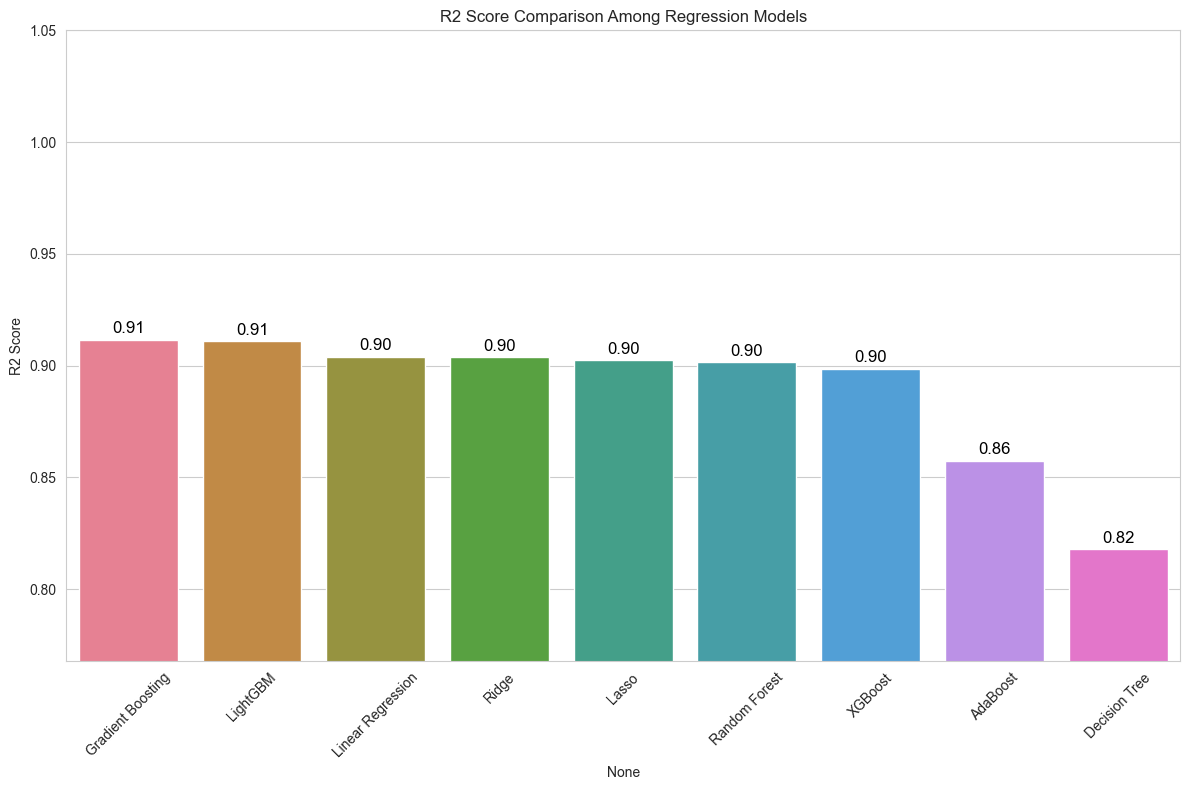

C:\Users\asad1\AppData\Local\Temp\ipykernel_28404\1006554028.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=sorted_df.index, y=sorted_df[metric], palette=colors)


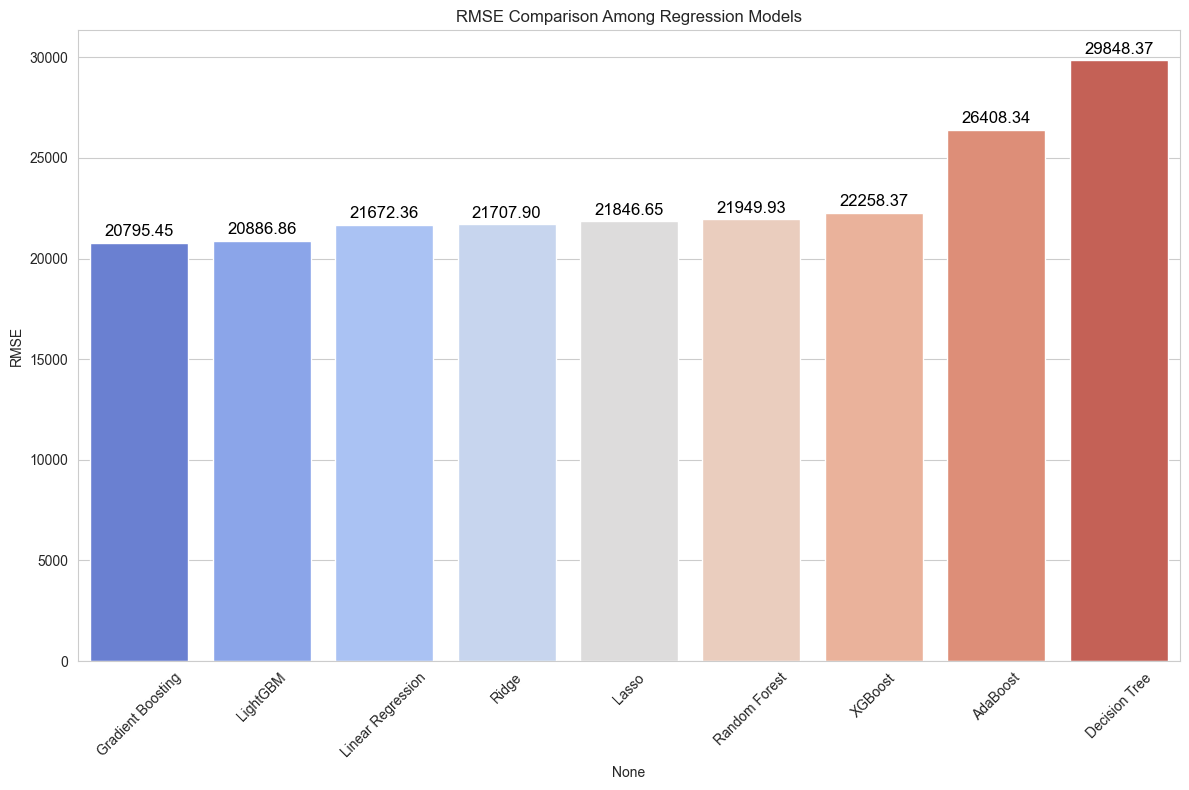

In [44]:
# Sorting the models based on their R2 scores for better visualization
sorted_results = results_df.sort_values(by="R2", ascending=False)

# Function to plot the metrics
def plot_metric(dataframe, metric, title, y_label, color_palette, ylim=None):
    sorted_df = dataframe.sort_values(by=metric, ascending=(metric != "R2"))  # Sort by metric
    plt.figure(figsize=(12, 8))
    colors = sns.color_palette(color_palette, len(sorted_df))  # Generate a list of unique colors
    bars = sns.barplot(x=sorted_df.index, y=sorted_df[metric], palette=colors)

    # Annotate bars
    for p in bars.patches:
        bars.annotate(f"{p.get_height():.2f}", 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='center', 
                      fontsize=12, color='black', 
                      xytext=(0, 8), 
                      textcoords='offset points')

    plt.ylabel(y_label)
    plt.title(title)
    plt.xticks(rotation=45)
    if ylim:
        plt.ylim(ylim)
    plt.tight_layout()
    plt.show()

# Plotting R2 scores
plot_metric(sorted_results, "R2", "R2 Score Comparison Among Regression Models", 
            "R2 Score", "husl", [min(sorted_results['R2']) - 0.05, 1.05])

# Plotting RMSE
plot_metric(sorted_results, "RMSE", "RMSE Comparison Among Regression Models", 
            "RMSE", "coolwarm")


In [45]:
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import RandomizedSearchCV

# 1. Stacking

# Defining the base models
base_models = [
    ('Random Forest', RandomForestRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor()),
    ('XGBoost', xgb.XGBRegressor(objective='reg:squarederror')),
    ('LightGBM', lgb.LGBMRegressor())
]

# Initializing the Stacking Regressor
stacked_model = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())

# Training the Stacking Regressor
stacked_model.fit(X_train, y_train)

# Predicting with Stacking Regressor
y_pred_stacked = stacked_model.predict(X_test)

# Evaluation Metrics for Stacking Regressor
mae_stacked = mean_absolute_error(y_test, y_pred_stacked)
mse_stacked = mean_squared_error(y_test, y_pred_stacked)
rmse_stacked = np.sqrt(mse_stacked)
r2_stacked = r2_score(y_test, y_pred_stacked)

stacked_results = {"Stacking": [mae_stacked, mse_stacked, rmse_stacked, r2_stacked]}

# 2. Blending (Using Linear Regression as the meta-model)

# Splitting the training data further into two subsets for blending
X_train_blend, X_val_blend, y_train_blend, y_val_blend = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

# Creating an empty DataFrame for storing blending features
blend_features = pd.DataFrame()

# Training base models and collecting their predictions on validation set
for name, model in base_models:
    model.fit(X_train_blend, y_train_blend)
    blend_features[name] = model.predict(X_val_blend)

# Training the meta-model on top of the base model predictions
meta_model = LinearRegression().fit(blend_features, y_val_blend)

# Preparing test data for blending (using predictions from base models as features)
blend_test_features = pd.DataFrame()
for name, model in base_models:
    blend_test_features[name] = model.predict(X_test)

# Predicting with the meta-model
y_pred_blend = meta_model.predict(blend_test_features)

# Evaluation Metrics for Blending
mae_blend = mean_absolute_error(y_test, y_pred_blend)
mse_blend = mean_squared_error(y_test, y_pred_blend)
rmse_blend = np.sqrt(mse_blend)
r2_blend = r2_score(y_test, y_pred_blend)

blend_results = {"Blending": [mae_blend, mse_blend, rmse_blend, r2_blend]}

# 3. Hyperparameter Tuning

# Parameters for Randomized Search
xgb_params = {
    'learning_rate': [0.01, 0.05, 0.1, 0.5],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_child_weight': [1, 2, 3, 4],
    'n_estimators': [100, 200, 300, 400, 500],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

gb_params = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.5],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'subsample': [0.8, 0.9, 1.0]
}

lgb_params = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.5],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'num_leaves': [31, 62, 93, 124, 155],
    'min_child_samples': [10, 20, 30],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# XGBoost
xgb_search = RandomizedSearchCV(xgb.XGBRegressor(objective='reg:squarederror'), xgb_params, n_iter=10, scoring='neg_mean_squared_error', cv=3, random_state=42)
xgb_search.fit(X_train, y_train)

# Gradient Boosting
gb_search = RandomizedSearchCV(GradientBoostingRegressor(), gb_params, n_iter=10, scoring='neg_mean_squared_error', cv=3, random_state=42)
gb_search.fit(X_train, y_train)

# LightGBM
lgb_search = RandomizedSearchCV(lgb.LGBMRegressor(), lgb_params, n_iter=10, scoring='neg_mean_squared_error', cv=3, random_state=42)
lgb_search.fit(X_train, y_train)

# Best models from Randomized Search
best_xgb = xgb_search.best_estimator_
best_gb = gb_search.best_estimator_
best_lgb = lgb_search.best_estimator_

# Training and Predicting with the best models
best_xgb.fit(X_train, y_train)
y_pred_xgb_tuned = best_xgb.predict(X_test)

best_gb.fit(X_train, y_train)
y_pred_gb_tuned = best_gb.predict(X_test)

best_lgb.fit(X_train, y_train)
y_pred_lgb_tuned = best_lgb.predict(X_test)

# Evaluation Metrics for the best models
mae_xgb_tuned = mean_absolute_error(y_test, y_pred_xgb_tuned)
mse_xgb_tuned = mean_squared_error(y_test, y_pred_xgb_tuned)
rmse_xgb_tuned = np.sqrt(mse_xgb_tuned)
r2_xgb_tuned = r2_score(y_test, y_pred_xgb_tuned)

mae_gb_tuned = mean_absolute_error(y_test, y_pred_gb_tuned)
mse_gb_tuned = mean_squared_error(y_test, y_pred_gb_tuned)
rmse_gb_tuned = np.sqrt(mse_gb_tuned)
r2_gb_tuned = r2_score(y_test, y_pred_gb_tuned)

mae_lgb_tuned = mean_absolute_error(y_test, y_pred_lgb_tuned)
mse_lgb_tuned = mean_squared_error(y_test, y_pred_lgb_tuned)
rmse_lgb_tuned = np.sqrt(mse_lgb_tuned)
r2_lgb_tuned = r2_score(y_test, y_pred_lgb_tuned)

# Results
xgb_tuned_results = {"XGBoost Tuned": [mae_xgb_tuned, mse_xgb_tuned, rmse_xgb_tuned, r2_xgb_tuned]}
gb_tuned_results = {"Gradient Boosting Tuned": [mae_gb_tuned, mse_gb_tuned, rmse_gb_tuned, r2_gb_tuned]}
lgb_tuned_results = {"LightGBM Tuned": [mae_lgb_tuned, mse_lgb_tuned, rmse_lgb_tuned, r2_lgb_tuned]}

# Combining all results
all_results = {**results, **stacked_results, **blend_results, **xgb_tuned_results, **gb_tuned_results, **lgb_tuned_results}

# Updating the results DataFrame
results_df_updated = pd.DataFrame(all_results, index=["MAE", "MSE", "RMSE", "R2"]).T
results_df_updated


c:\Users\asad1\OneDrive\Desktop\ABB Proj\houseprices_env\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\asad1\OneDrive\Desktop\ABB Proj\houseprices_env\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\asad1\OneDrive\Desktop\ABB Proj\houseprices_env\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\asad1\OneDrive\Desktop\ABB Proj\houseprices_env\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000319 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4052
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 30
[LightGBM] [Info] Start training from score 178189.621575


c:\Users\asad1\OneDrive\Desktop\ABB Proj\houseprices_env\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\asad1\OneDrive\Desktop\ABB Proj\houseprices_env\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\asad1\OneDrive\Desktop\ABB Proj\houseprices_env\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\asad1\OneDrive\Desktop\ABB Proj\houseprices_env\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000282 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3924
[LightGBM] [Info] Number of data points in the train set: 934, number of used features: 30
[LightGBM] [Info] Start training from score 178266.188437
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000494 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3919
[LightGBM] [Info] Number of data points in the train set: 934, number of used features: 30
[LightGBM] [Info] Start training from score 176296.275696
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead

c:\Users\asad1\OneDrive\Desktop\ABB Proj\houseprices_env\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\asad1\OneDrive\Desktop\ABB Proj\houseprices_env\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\asad1\OneDrive\Desktop\ABB Proj\houseprices_env\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\asad1\OneDrive\Desktop\ABB Proj\houseprices_env\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000343 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2930
[LightGBM] [Info] Number of data points in the train set: 584, number of used features: 30
[LightGBM] [Info] Start training from score 177679.267123
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

c:\Users\asad1\OneDrive\Desktop\ABB Proj\houseprices_env\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\asad1\OneDrive\Desktop\ABB Proj\houseprices_env\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\asad1\OneDrive\Desktop\ABB Proj\houseprices_env\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\asad1\OneDrive\Desktop\ABB Proj\houseprices_env\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000750 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3780
[LightGBM] [Info] Number of data points in the train set: 778, number of used features: 30
[LightGBM] [Info] Start training from score 176532.700514
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

c:\Users\asad1\OneDrive\Desktop\ABB Proj\houseprices_env\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\asad1\OneDrive\Desktop\ABB Proj\houseprices_env\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\asad1\OneDrive\Desktop\ABB Proj\houseprices_env\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\asad1\OneDrive\Desktop\ABB Proj\houseprices_env\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000719 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4052
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 30
[LightGBM] [Info] Start training from score 178189.621575
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

MAE           MSE          RMSE        R2
Linear Regression        16679.046674  4.696910e+08  21672.356177  0.903934
Ridge                    16577.881845  4.712328e+08  21707.896862  0.903619
Lasso                    16639.285195  4.772759e+08  21846.645675  0.902383
Decision Tree            21397.592466  8.909252e+08  29848.370912  0.817779
Random Forest            15138.122346  4.817995e+08  21949.931275  0.901457
Gradient Boosting        15026.483570  4.324508e+08  20795.450401  0.911551
XGBoost                  15508.458958  4.954350e+08  22258.368825  0.898669
LightGBM                 14365.461180  4.362609e+08  20886.858800  0.910771
AdaBoost                 20324.493233  6.974005e+08  26408.340994  0.857360
Stacking                 14517.123290  4.155215e+08  20384.344254  0.915013
Blending                 15055.665205  4.504844e+08  21224.618111  0.907862
XGBoost Tuned            14598.349957  4.362749e+08  20887.193923  0.910769
Gradient Boosting Tuned  14146.283873  4.291380e+08  20715.646766  0.912228
LightGBM Tuned           14657.862140  4.558525e+08  21350.702587  0.906764

C:\Users\asad1\AppData\Local\Temp\ipykernel_28404\739825395.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=sorted_df.index, y=sorted_df[metric], palette=colors)


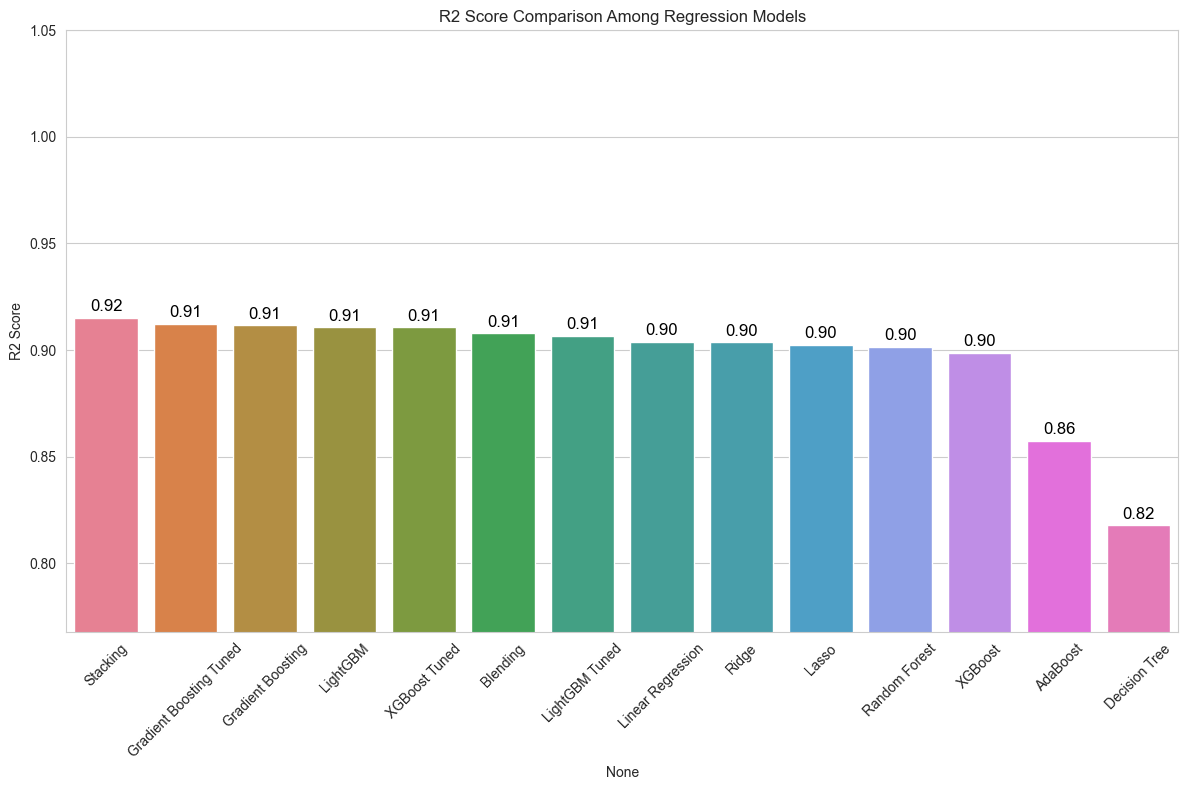

C:\Users\asad1\AppData\Local\Temp\ipykernel_28404\739825395.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=sorted_df.index, y=sorted_df[metric], palette=colors)


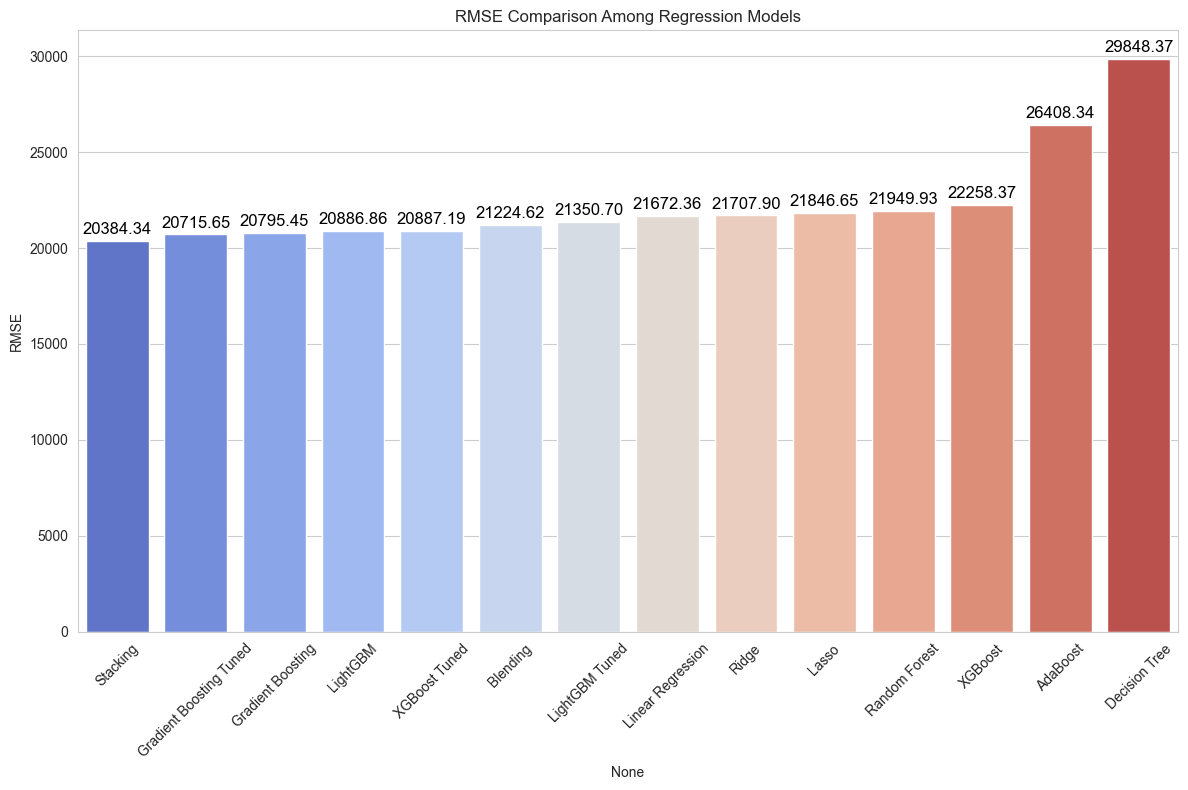

In [46]:
# Sorting the models based on their R2 scores for better visualization
sorted_results = results_df_updated.sort_values(by="R2", ascending=False)

# Function to plot the metrics
def plot_metric(dataframe, metric, title, y_label, color_palette, ylim=None):
    sorted_df = dataframe.sort_values(by=metric, ascending=(metric != "R2"))  # Sort by metric
    plt.figure(figsize=(12, 8))
    colors = sns.color_palette(color_palette, len(sorted_df))  # Generate a list of unique colors
    bars = sns.barplot(x=sorted_df.index, y=sorted_df[metric], palette=colors)

    # Annotate bars
    for p in bars.patches:
        bars.annotate(f"{p.get_height():.2f}", 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='center', 
                      fontsize=12, color='black', 
                      xytext=(0, 8), 
                      textcoords='offset points')

    plt.ylabel(y_label)
    plt.title(title)
    plt.xticks(rotation=45)
    if ylim:
        plt.ylim(ylim)
    plt.tight_layout()
    plt.show()

# Plotting R2 scores
plot_metric(sorted_results, "R2", "R2 Score Comparison Among Regression Models", 
            "R2 Score", "husl", [min(sorted_results['R2']) - 0.05, 1.05])

# Plotting RMSE
plot_metric(sorted_results, "RMSE", "RMSE Comparison Among Regression Models", 
            "RMSE", "coolwarm")